# Plot-1: mRDP=on/off Kinematics with ktdurham = TMS
Compare the kinematic properties of mRDP = on/off with cross-section unit

## 1. Import Packages

In [1]:
# The Python Standard Library
import os
import sys
import time
import datetime
import glob
import multiprocessing as mp

# The Third-Party Library
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import prettytable
import uproot
import pyjet
import importlib

# My Packages
import myhep.particle_information_v2 as mypiv2
import myhep.analytical_function_v2 as myafv2
import myhep.particleinfo_v1 as mypiv1
import myhep.particlefun_v1 as myafv1

# increase figure showing resolution
%config InlineBackend.figure_format = 'retina'

## 2. Load the Data

### 2-1. main89

In [2]:
# tms = 10
df_xdxdx_23_4_10 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms10/Analysis/ana1_rinv3_Lambdad5_4_S23.csv')
df_xdxdx_71_4_10 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms10/Analysis/ana1_rinv3_Lambdad5_4_S71.csv')
analyzed_data_4_10 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms10/Analysis/ana1_rinv3_Lambdad5_4.npz')
analyzed_data_Weight_4_10 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms10/Analysis/ana1_rinv3_Lambdad5_4_Weight.npz', allow_pickle=True)

df_xdxdx_23_8_10 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms10/Analysis/ana1_rinv3_Lambdad5_8_S23.csv')
df_xdxdx_71_8_10 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms10/Analysis/ana1_rinv3_Lambdad5_8_S71.csv')
analyzed_data_8_10 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms10/Analysis/ana1_rinv3_Lambdad5_8.npz')
analyzed_data_Weight_8_10 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms10/Analysis/ana1_rinv3_Lambdad5_8_Weight.npz', allow_pickle=True)

# ============================================================
# tms = 20
df_xdxdx_23_4_20 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_4_S23.csv')
df_xdxdx_71_4_20 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_4_S71.csv')
analyzed_data_4_20 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_4.npz')
analyzed_data_Weight_4_20 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_4_Weight.npz', allow_pickle=True)

df_xdxdx_23_8_20 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_8_S23.csv')
df_xdxdx_71_8_20 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_8_S71.csv')
analyzed_data_8_20 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_8.npz')
analyzed_data_Weight_8_20 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms20/Analysis/ana1_rinv3_Lambdad5_8_Weight.npz', allow_pickle=True)

# ============================================================
# tms = 30
df_xdxdx_23_4_30 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms30/Analysis/ana1_rinv3_Lambdad5_4_S23.csv')
df_xdxdx_71_4_30 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms30/Analysis/ana1_rinv3_Lambdad5_4_S71.csv')
analyzed_data_4_30 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms30/Analysis/ana1_rinv3_Lambdad5_4.npz')
analyzed_data_Weight_4_30 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms30/Analysis/ana1_rinv3_Lambdad5_4_Weight.npz', allow_pickle=True)

df_xdxdx_23_8_30 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms30/Analysis/ana1_rinv3_Lambdad5_8_S23.csv')
df_xdxdx_71_8_30 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms30/Analysis/ana1_rinv3_Lambdad5_8_S71.csv')
analyzed_data_8_30 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms30/Analysis/ana1_rinv3_Lambdad5_8.npz')
analyzed_data_Weight_8_30 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms30/Analysis/ana1_rinv3_Lambdad5_8_Weight.npz', allow_pickle=True)

# ============================================================
# tms = 50 using iseed 2
df_xdxdx_23_4_50 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_4_S23.csv')
df_xdxdx_71_4_50 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_4_S71.csv')
analyzed_data_4_50 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_4.npz')
analyzed_data_Weight_4_50 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_4_Weight.npz', allow_pickle=True)

df_xdxdx_23_8_50 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_8_S23.csv')
df_xdxdx_71_8_50 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_8_S71.csv')
analyzed_data_8_50 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_8.npz')
analyzed_data_Weight_8_50 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms50_iseed2/Analysis/ana1_rinv3_Lambdad5_8_Weight.npz', allow_pickle=True)

# ============================================================
# tms = 70 using iseed
df_xdxdx_23_4_70 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms70_iseed/Analysis/ana1_rinv3_Lambdad5_4_S23.csv')
df_xdxdx_71_4_70 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms70_iseed/Analysis/ana1_rinv3_Lambdad5_4_S71.csv')
analyzed_data_4_70 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms70_iseed/Analysis/ana1_rinv3_Lambdad5_4.npz')
analyzed_data_Weight_4_70 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms70_iseed/Analysis/ana1_rinv3_Lambdad5_4_Weight.npz', allow_pickle=True)

df_xdxdx_23_8_70 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms70_iseed/Analysis/ana1_rinv3_Lambdad5_8_S23.csv')
df_xdxdx_71_8_70 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms70_iseed/Analysis/ana1_rinv3_Lambdad5_8_S71.csv')
analyzed_data_8_70 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms70_iseed/Analysis/ana1_rinv3_Lambdad5_8.npz')
analyzed_data_Weight_8_70 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms70_iseed/Analysis/ana1_rinv3_Lambdad5_8_Weight.npz', allow_pickle=True)

# ============================================================
# tms = 100
df_xdxdx_23_4_100 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms100/Analysis/ana1_rinv3_Lambdad5_4_S23.csv')
df_xdxdx_71_4_100 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms100/Analysis/ana1_rinv3_Lambdad5_4_S71.csv')
analyzed_data_4_100 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms100/Analysis/ana1_rinv3_Lambdad5_4.npz')
analyzed_data_Weight_4_100 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms100/Analysis/ana1_rinv3_Lambdad5_4_Weight.npz', allow_pickle=True)

df_xdxdx_23_8_100 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms100/Analysis/ana1_rinv3_Lambdad5_8_S23.csv')
df_xdxdx_71_8_100 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms100/Analysis/ana1_rinv3_Lambdad5_8_S71.csv')
analyzed_data_8_100 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms100/Analysis/ana1_rinv3_Lambdad5_8.npz')
analyzed_data_Weight_8_100 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms100/Analysis/ana1_rinv3_Lambdad5_8_Weight.npz', allow_pickle=True)

# ============================================================
# tms = 130
df_xdxdx_23_4_130 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms130/Analysis/ana1_rinv3_Lambdad5_4_S23.csv')
df_xdxdx_71_4_130 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms130/Analysis/ana1_rinv3_Lambdad5_4_S71.csv')
analyzed_data_4_130 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms130/Analysis/ana1_rinv3_Lambdad5_4.npz')
analyzed_data_Weight_4_130 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms130/Analysis/ana1_rinv3_Lambdad5_4_Weight.npz', allow_pickle=True)

df_xdxdx_23_8_130 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms130/Analysis/ana1_rinv3_Lambdad5_8_S23.csv')
df_xdxdx_71_8_130 = pd.read_csv('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms130/Analysis/ana1_rinv3_Lambdad5_8_S71.csv')
analyzed_data_8_130 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms130/Analysis/ana1_rinv3_Lambdad5_8.npz')
analyzed_data_Weight_8_130 = np.load('/youwei_home/SVJ_CKKWL/PYTHIA_Experts_tms/s_ckkwl_tms130/Analysis/ana1_rinv3_Lambdad5_8_Weight.npz', allow_pickle=True)

In [3]:
print(analyzed_data_4_10.files)
print(analyzed_data_Weight_4_10.files)

['truth_jet', 'truth_jet_filterDM', 'truth_MET', 'detector_jet']
['weight']


In [4]:
# tms = 10
M_xdxdx_23_4_10 = df_xdxdx_23_4_10['M_xdxdx'].to_numpy()
M_xdxdx_23_8_10 = df_xdxdx_23_8_10['M_xdxdx'].to_numpy()

# tms = 20
M_xdxdx_23_4_20 = df_xdxdx_23_4_20['M_xdxdx'].to_numpy()
M_xdxdx_23_8_20 = df_xdxdx_23_8_20['M_xdxdx'].to_numpy()

# tms = 30
M_xdxdx_23_4_30 = df_xdxdx_23_4_30['M_xdxdx'].to_numpy()
M_xdxdx_23_8_30 = df_xdxdx_23_8_30['M_xdxdx'].to_numpy()

# tms = 50
M_xdxdx_23_4_50 = df_xdxdx_23_4_50['M_xdxdx'].to_numpy()
M_xdxdx_23_8_50 = df_xdxdx_23_8_50['M_xdxdx'].to_numpy()

# tms = 70
M_xdxdx_23_4_70 = df_xdxdx_23_4_70['M_xdxdx'].to_numpy()
M_xdxdx_23_8_70 = df_xdxdx_23_8_70['M_xdxdx'].to_numpy()

# tms = 100
M_xdxdx_23_4_100 = df_xdxdx_23_4_100['M_xdxdx'].to_numpy()
M_xdxdx_23_8_100 = df_xdxdx_23_8_100['M_xdxdx'].to_numpy()

# tms = 130
M_xdxdx_23_4_130 = df_xdxdx_23_4_130['M_xdxdx'].to_numpy()
M_xdxdx_23_8_130 = df_xdxdx_23_8_130['M_xdxdx'].to_numpy()

In [5]:
# tms = 10
truth_jet_filterDM_4_10 = analyzed_data_4_10['truth_jet_filterDM']
truth_MET_4_10 = analyzed_data_4_10['truth_MET']
weight_4_10 = analyzed_data_Weight_4_10['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_fDM_4_10 = truth_jet_filterDM_4_10[3].astype(np.int64)
s_t_MET_4_10 = truth_MET_4_10[4].astype(np.int64)

truth_jet_filterDM_8_10 = analyzed_data_8_10['truth_jet_filterDM']
truth_MET_8_10 = analyzed_data_8_10['truth_MET']
weight_8_10 = analyzed_data_Weight_8_10['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_fDM_8_10 = truth_jet_filterDM_8_10[3].astype(np.int64)
s_t_MET_8_10 = truth_MET_8_10[4].astype(np.int64)

# ============================================================
# tms = 20
truth_jet_filterDM_4_20 = analyzed_data_4_20['truth_jet_filterDM']
truth_MET_4_20 = analyzed_data_4_20['truth_MET']
weight_4_20 = analyzed_data_Weight_4_20['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_fDM_4_20 = truth_jet_filterDM_4_20[3].astype(np.int64)
s_t_MET_4_20 = truth_MET_4_20[4].astype(np.int64)

truth_jet_filterDM_8_20 = analyzed_data_8_20['truth_jet_filterDM']
truth_MET_8_20 = analyzed_data_8_20['truth_MET']
weight_8_20 = analyzed_data_Weight_8_20['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_fDM_8_20 = truth_jet_filterDM_8_20[3].astype(np.int64)
s_t_MET_8_20 = truth_MET_8_20[4].astype(np.int64)

# ============================================================
# tms = 30
truth_jet_filterDM_4_30 = analyzed_data_4_30['truth_jet_filterDM']
truth_MET_4_30 = analyzed_data_4_30['truth_MET']
weight_4_30 = analyzed_data_Weight_4_30['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_fDM_4_30 = truth_jet_filterDM_4_30[3].astype(np.int64)
s_t_MET_4_30 = truth_MET_4_30[4].astype(np.int64)

truth_jet_filterDM_8_30 = analyzed_data_8_30['truth_jet_filterDM']
truth_MET_8_30 = analyzed_data_8_30['truth_MET']
weight_8_30 = analyzed_data_Weight_8_30['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_fDM_8_30 = truth_jet_filterDM_8_30[3].astype(np.int64)
s_t_MET_8_30 = truth_MET_8_30[4].astype(np.int64)

# ============================================================
# tms = 50
truth_jet_filterDM_4_50 = analyzed_data_4_50['truth_jet_filterDM']
truth_MET_4_50 = analyzed_data_4_50['truth_MET']
weight_4_50 = analyzed_data_Weight_4_50['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_fDM_4_50 = truth_jet_filterDM_4_50[3].astype(np.int64)
s_t_MET_4_50 = truth_MET_4_50[4].astype(np.int64)

truth_jet_filterDM_8_50 = analyzed_data_8_50['truth_jet_filterDM']
truth_MET_8_50 = analyzed_data_8_50['truth_MET']
weight_8_50 = analyzed_data_Weight_8_50['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_fDM_8_50 = truth_jet_filterDM_8_50[3].astype(np.int64)
s_t_MET_8_50 = truth_MET_8_50[4].astype(np.int64)

# ============================================================
# tms = 70
truth_jet_filterDM_4_70 = analyzed_data_4_70['truth_jet_filterDM']
truth_MET_4_70 = analyzed_data_4_70['truth_MET']
weight_4_70 = analyzed_data_Weight_4_70['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_fDM_4_70 = truth_jet_filterDM_4_70[3].astype(np.int64)
s_t_MET_4_70 = truth_MET_4_70[4].astype(np.int64)

truth_jet_filterDM_8_70 = analyzed_data_8_70['truth_jet_filterDM']
truth_MET_8_70 = analyzed_data_8_70['truth_MET']
weight_8_70 = analyzed_data_Weight_8_70['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_fDM_8_70 = truth_jet_filterDM_8_70[3].astype(np.int64)
s_t_MET_8_70 = truth_MET_8_70[4].astype(np.int64)

# ============================================================
# tms = 100
truth_jet_filterDM_4_100 = analyzed_data_4_100['truth_jet_filterDM']
truth_MET_4_100 = analyzed_data_4_100['truth_MET']
weight_4_100 = analyzed_data_Weight_4_100['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_fDM_4_100 = truth_jet_filterDM_4_100[3].astype(np.int64)
s_t_MET_4_100 = truth_MET_4_100[4].astype(np.int64)

truth_jet_filterDM_8_100 = analyzed_data_8_100['truth_jet_filterDM']
truth_MET_8_100 = analyzed_data_8_100['truth_MET']
weight_8_100 = analyzed_data_Weight_8_100['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_fDM_8_100 = truth_jet_filterDM_8_100[3].astype(np.int64)
s_t_MET_8_100 = truth_MET_8_100[4].astype(np.int64)

# ============================================================
# tms = 130
truth_jet_filterDM_4_130 = analyzed_data_4_130['truth_jet_filterDM']
truth_MET_4_130 = analyzed_data_4_130['truth_MET']
weight_4_130 = analyzed_data_Weight_4_130['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_fDM_4_130 = truth_jet_filterDM_4_130[3].astype(np.int64)
s_t_MET_4_130 = truth_MET_4_130[4].astype(np.int64)

truth_jet_filterDM_8_130 = analyzed_data_8_130['truth_jet_filterDM']
truth_MET_8_130 = analyzed_data_8_130['truth_MET']
weight_8_130 = analyzed_data_Weight_8_130['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_fDM_8_130 = truth_jet_filterDM_8_130[3].astype(np.int64)
s_t_MET_8_130 = truth_MET_8_130[4].astype(np.int64)

### 2-2. Check the information of data

In [6]:
print("tms = 10:")
print("There are {} events in the .root file.".format(weight_4_10.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_4_10)[0]))
print('-'*40)
print("There are {} events in the .root file.".format(weight_8_10.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_8_10)[0]))
print("="*60)

print("tms = 20:")
print("There are {} events in the .root file.".format(weight_4_20.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_4_20)[0]))
print('-'*40)
print("There are {} events in the .root file.".format(weight_8_20.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_8_20)[0]))
print("="*60)

print("tms = 30:")
print("There are {} events in the .root file.".format(weight_4_30.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_4_30)[0]))
print('-'*40)
print("There are {} events in the .root file.".format(weight_8_30.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_8_30)[0]))
print("="*60)

print("tms = 50:")
print("There are {} events in the .root file.".format(weight_4_50.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_4_50)[0]))
print('-'*40)
print("There are {} events in the .root file.".format(weight_8_50.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_8_50)[0]))
print("="*60)

print("tms = 70:")
print("There are {} events in the .root file.".format(weight_4_70.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_4_70)[0]))
print('-'*40)
print("There are {} events in the .root file.".format(weight_8_70.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_8_70)[0]))
print("="*60)

print("tms = 100:")
print("There are {} events in the .root file.".format(weight_4_100.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_4_100)[0]))
print('-'*40)
print("There are {} events in the .root file.".format(weight_8_100.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_8_100)[0]))
print("="*60)

print("tms = 130:")
print("There are {} events in the .root file.".format(weight_4_130.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_4_130)[0]))
print('-'*40)
print("There are {} events in the .root file.".format(weight_8_130.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_8_130)[0]))
print("="*60)

tms = 10:
There are 7138 events in the .root file.
Cross section = 1.1302504404876783 pb
----------------------------------------
There are 98 events in the .root file.
Cross section = 0.013294792458769245 pb
tms = 20:
There are 7322 events in the .root file.
Cross section = 1.125914225859173 pb
----------------------------------------
There are 98 events in the .root file.
Cross section = 0.012788425659692078 pb
tms = 30:
There are 8148 events in the .root file.
Cross section = 0.9949907200851204 pb
----------------------------------------
There are 137 events in the .root file.
Cross section = 0.014194997126793386 pb
tms = 50:
There are 8957 events in the .root file.
Cross section = 0.8489344991817418 pb
----------------------------------------
There are 204 events in the .root file.
Cross section = 0.017210953121666803 pb
tms = 70:
There are 9353 events in the .root file.
Cross section = 0.7707402087429968 pb
----------------------------------------
There are 242 events in the .root

#### Conclusion: The results are consistent with PYTHIA outputs.

## 3. Plot

In [7]:
# 139 fb^(-1) = 139*1000 pb^(-1)
LUMINOSITY = 139*1000

### 3-1. Dark quark pair

#### 1. $M(xd,\bar{xd})$ for mRDP = on/off

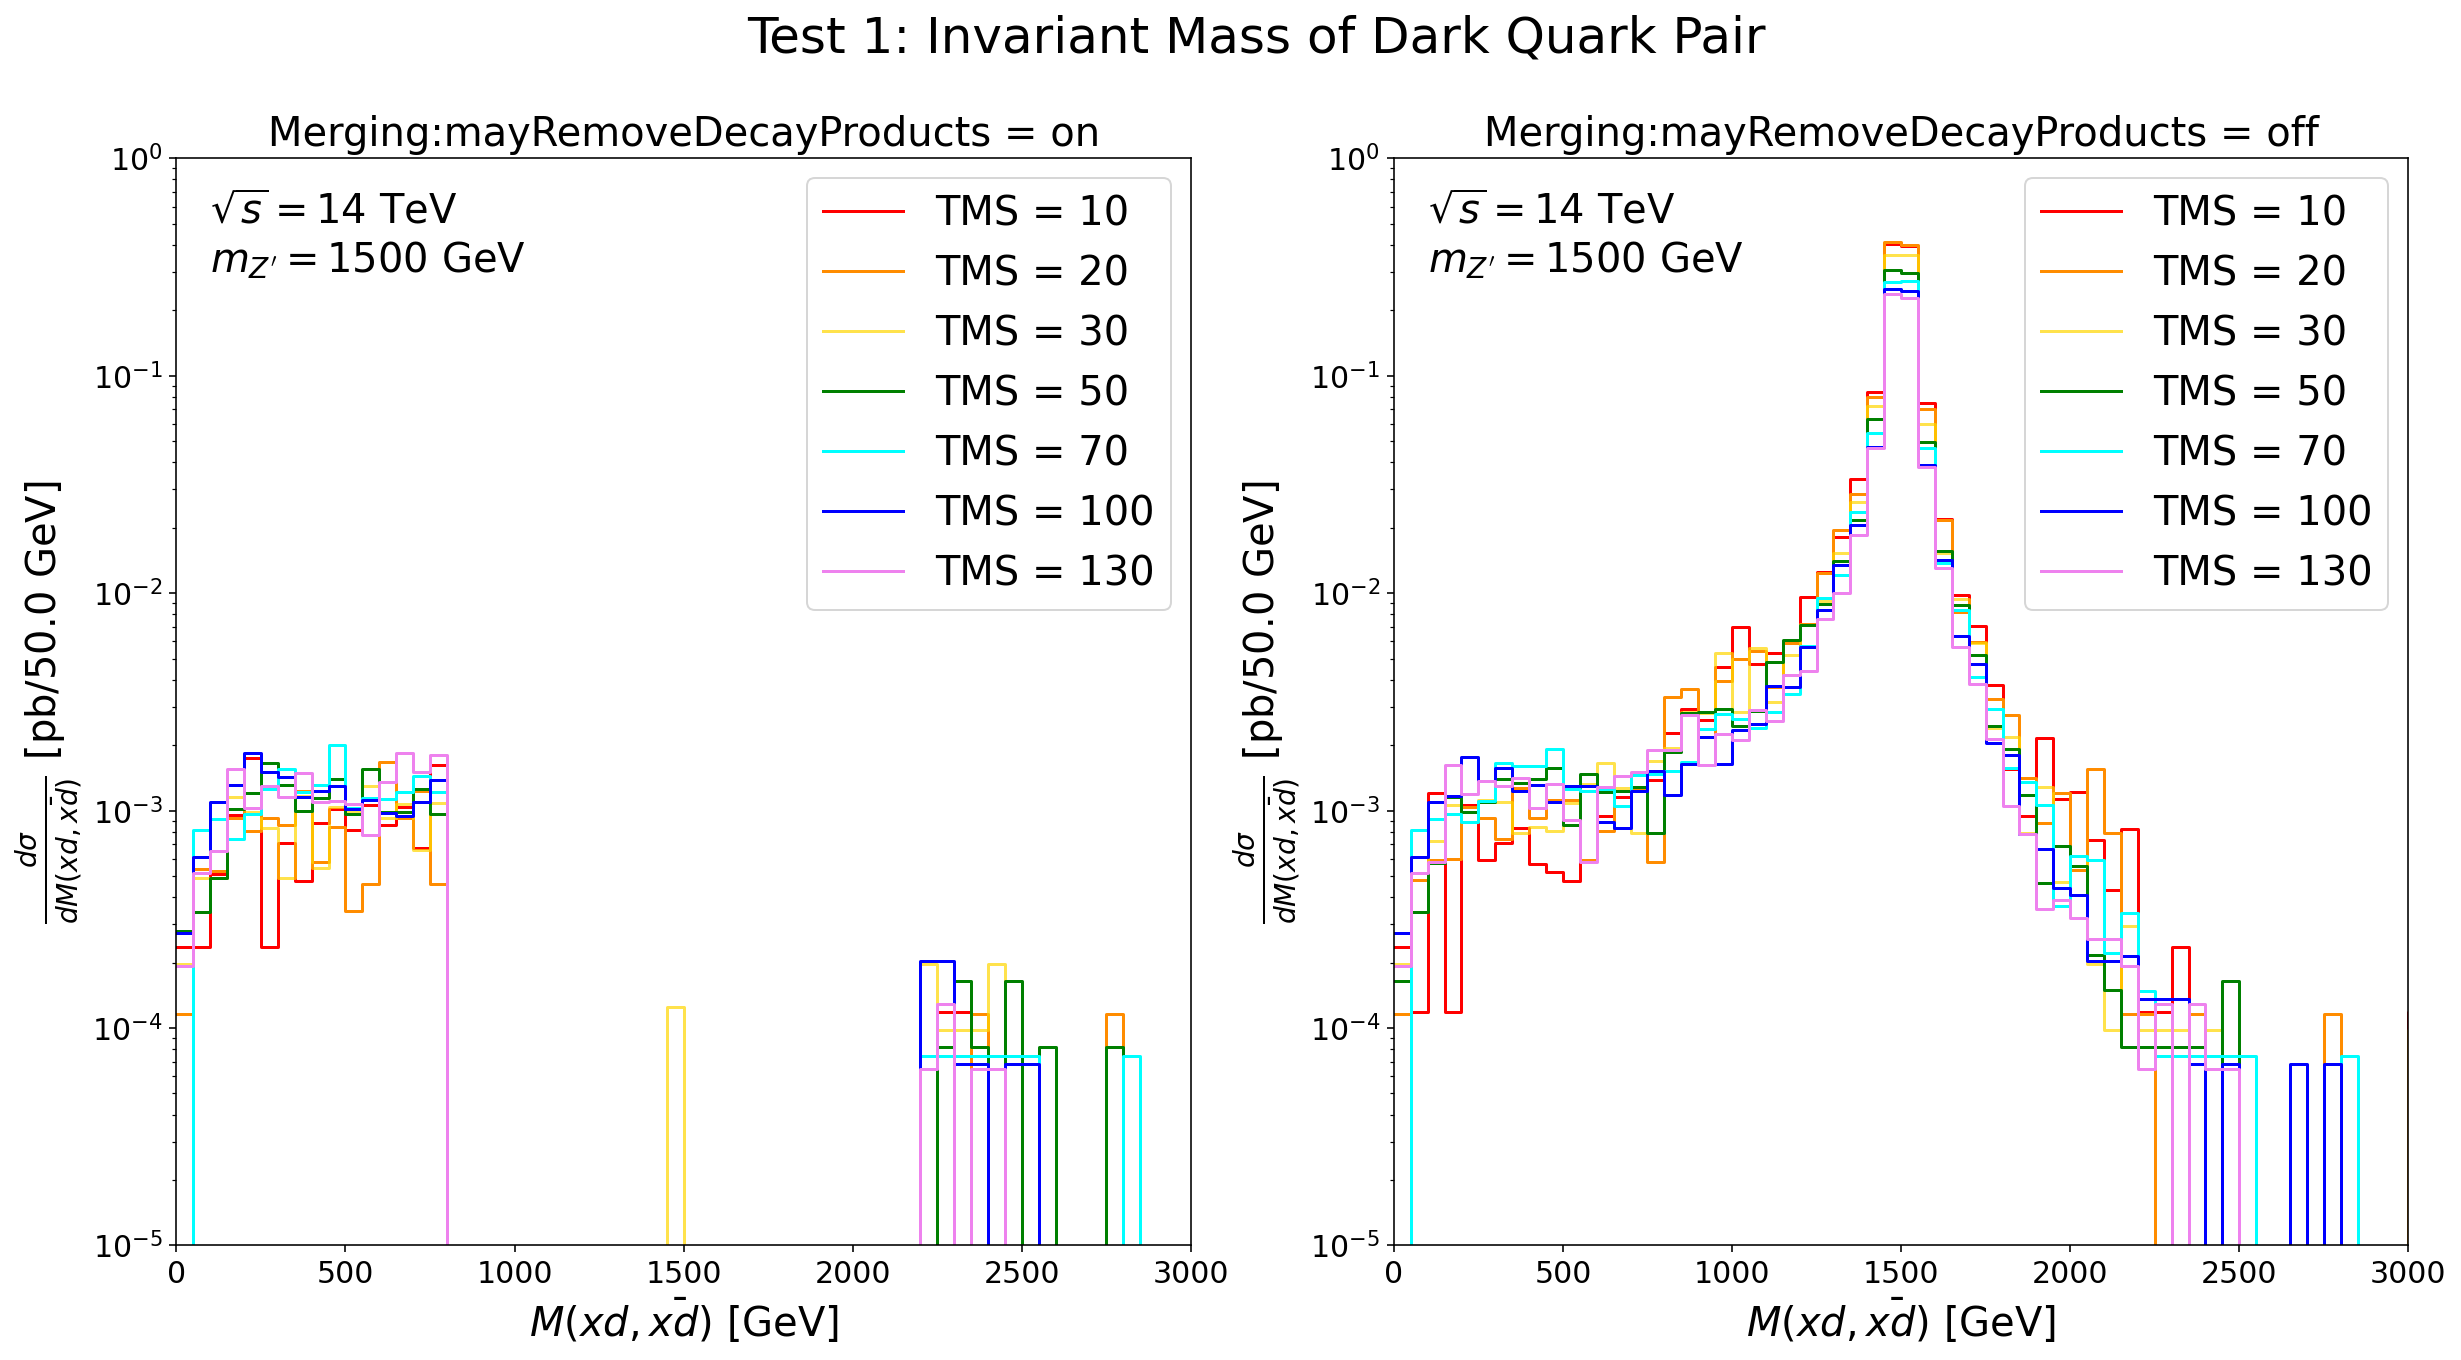

In [8]:
# 1. Figure
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 101)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(M_xdxdx_23_8_10, bins=binning, weights=weight_8_10)
hist0_2, bins0_2 = np.histogram(M_xdxdx_23_8_20, bins=binning, weights=weight_8_20)
hist0_3, bins0_3 = np.histogram(M_xdxdx_23_8_30, bins=binning, weights=weight_8_30)
hist0_4, bins0_4 = np.histogram(M_xdxdx_23_8_50, bins=binning, weights=weight_8_50)
hist0_5, bins0_5 = np.histogram(M_xdxdx_23_8_70, bins=binning, weights=weight_8_70)
hist0_6, bins0_6 = np.histogram(M_xdxdx_23_8_100, bins=binning, weights=weight_8_100)
hist0_7, bins0_7 = np.histogram(M_xdxdx_23_8_130, bins=binning, weights=weight_8_130)

hist1_1, bins1_1 = np.histogram(M_xdxdx_23_4_10, bins=binning, weights=weight_4_10)
hist1_2, bins1_2 = np.histogram(M_xdxdx_23_4_20, bins=binning, weights=weight_4_20)
hist1_3, bins1_3 = np.histogram(M_xdxdx_23_4_30, bins=binning, weights=weight_4_30)
hist1_4, bins1_4 = np.histogram(M_xdxdx_23_4_50, bins=binning, weights=weight_4_50)
hist1_5, bins1_5 = np.histogram(M_xdxdx_23_4_70, bins=binning, weights=weight_4_70)
hist1_6, bins1_6 = np.histogram(M_xdxdx_23_4_100, bins=binning, weights=weight_4_100)
hist1_7, bins1_7 = np.histogram(M_xdxdx_23_4_130, bins=binning, weights=weight_4_130)

# 3. Plot
axs[0].step(bins0_1[:-1], hist0_1, where='post', color='red', label="TMS = 10")
axs[0].step(bins0_2[:-1], hist0_2, where='post', color='darkorange', label="TMS = 20")
axs[0].step(bins0_3[:-1], hist0_3, where='post', color='gold', alpha=0.7, label="TMS = 30")
axs[0].step(bins0_4[:-1], hist0_4, where='post', color='green', label="TMS = 50")
axs[0].step(bins0_5[:-1], hist0_5, where='post', color='cyan', label="TMS = 70")
axs[0].step(bins0_6[:-1], hist0_6, where='post', color='blue', label="TMS = 100")
axs[0].step(bins0_7[:-1], hist0_7, where='post', color='violet', label="TMS = 130")

axs[1].step(bins1_1[:-1], hist1_1, where='post', color='red', label="TMS = 10")
axs[1].step(bins1_2[:-1], hist1_2, where='post', color='darkorange', label="TMS = 20")
axs[1].step(bins1_3[:-1], hist1_3, where='post', color='gold', alpha=0.7, label="TMS = 30")
axs[1].step(bins1_4[:-1], hist1_4, where='post', color='green', label="TMS = 50")
axs[1].step(bins1_5[:-1], hist1_5, where='post', color='cyan', label="TMS = 70")
axs[1].step(bins1_6[:-1], hist1_6, where='post', color='blue', label="TMS = 100")
axs[1].step(bins1_7[:-1], hist1_7, where='post', color='violet', label="TMS = 130")

# 4. axes setting
# title and legend
fig.suptitle("Test 1: Invariant Mass of Dark Quark Pair", fontsize=25)
axs[0].legend(fontsize=20)
axs[1].legend(fontsize=20)
# sub-title and x & y labels
ylabel = "$\\frac{d\sigma}{dM(xd,\\bar{xd})}$ [pb/"+str(binning[-1]/(len(binning)-1))+" GeV]"
axs[0].set_title("Merging:mayRemoveDecayProducts = on", fontsize=20)
axs[0].set_xlabel("$M(xd,\\bar{xd})$ [GeV]", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("Merging:mayRemoveDecayProducts = off", fontsize=20)
axs[1].set_xlabel("$M(xd,\\bar{xd})$ [GeV]", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(0, 3000)
axs[0].set_ylim(1/100000, 1)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[1].set_xlim(0, 3000)
axs[1].set_ylim(1/100000, 1)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

# 5. text
tex1 = "$\sqrt{s} = 14$ TeV"
tex2 = "$\mathcal{L} = $"+str(int(LUMINOSITY/1000))+" $\mathrm{fb}^{-1}$"
tex3 = "$m_{Z^\prime} = 1500$ GeV"
axs[0].text(100, 0.5, tex1, fontsize=20)
# axs[0].text(100, 0.3, tex2, fontsize=20)
axs[0].text(100, 0.3, tex3, fontsize=20)
axs[1].text(100, 0.5, tex1, fontsize=20)
# axs[1].text(100, 0.3, tex2, fontsize=20)
axs[1].text(100, 0.3, tex3, fontsize=20)

plt.savefig("figures-1/fig1-1_DQP_mRDP_on_off_Mxdxdx.pdf")
plt.show()

In [9]:
print("Merging:mayRemoveDecayProducts = on:")
print("tms = 10, Cross-section = {} pb".format(np.sum(hist0_1)[0]))
print("tms = 20, Cross-section = {} pb".format(np.sum(hist0_2)[0]))
print("tms = 30, Cross-section = {} pb".format(np.sum(hist0_3)[0]))
print("tms = 50, Cross-section = {} pb".format(np.sum(hist0_4)[0]))
print("tms = 70, Cross-section = {} pb".format(np.sum(hist0_5)[0]))
print("tms = 100, Cross-section = {} pb".format(np.sum(hist0_6)[0]))
print("tms = 130, Cross-section = {} pb".format(np.sum(hist0_7)[0]))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("tms = 10, Cross-section = {} pb".format(np.sum(hist1_1)[0]))
print("tms = 20, Cross-section = {} pb".format(np.sum(hist1_2)[0]))
print("tms = 30, Cross-section = {} pb".format(np.sum(hist1_3)[0]))
print("tms = 50, Cross-section = {} pb".format(np.sum(hist1_4)[0]))
print("tms = 70, Cross-section = {} pb".format(np.sum(hist1_5)[0]))
print("tms = 100, Cross-section = {} pb".format(np.sum(hist1_6)[0]))
print("tms = 130, Cross-section = {} pb".format(np.sum(hist1_7)[0]))

Merging:mayRemoveDecayProducts = on:
tms = 10, Cross-section = 0.013294792458769245 pb
tms = 20, Cross-section = 0.012788425659692078 pb
tms = 30, Cross-section = 0.014194997126793386 pb
tms = 50, Cross-section = 0.017210953121666803 pb
tms = 70, Cross-section = 0.0185666262298898 pb
tms = 100, Cross-section = 0.018940151320413507 pb
tms = 130, Cross-section = 0.018787995681793235 pb
Merging:mayRemoveDecayProducts = off:
tms = 10, Cross-section = 1.1302504404876788 pb
tms = 20, Cross-section = 1.1259142258591786 pb
tms = 30, Cross-section = 0.9949907200851218 pb
tms = 50, Cross-section = 0.8489344991817409 pb
tms = 70, Cross-section = 0.7707402087429974 pb
tms = 100, Cross-section = 0.6992070931169857 pb
tms = 130, Cross-section = 0.6566651268360686 pb


#### Conclusion: The cross-sections have no problem.

### 3-2. Jet in the truth level

#### 1. Leading jet $p_T$ for mRDP = on/off

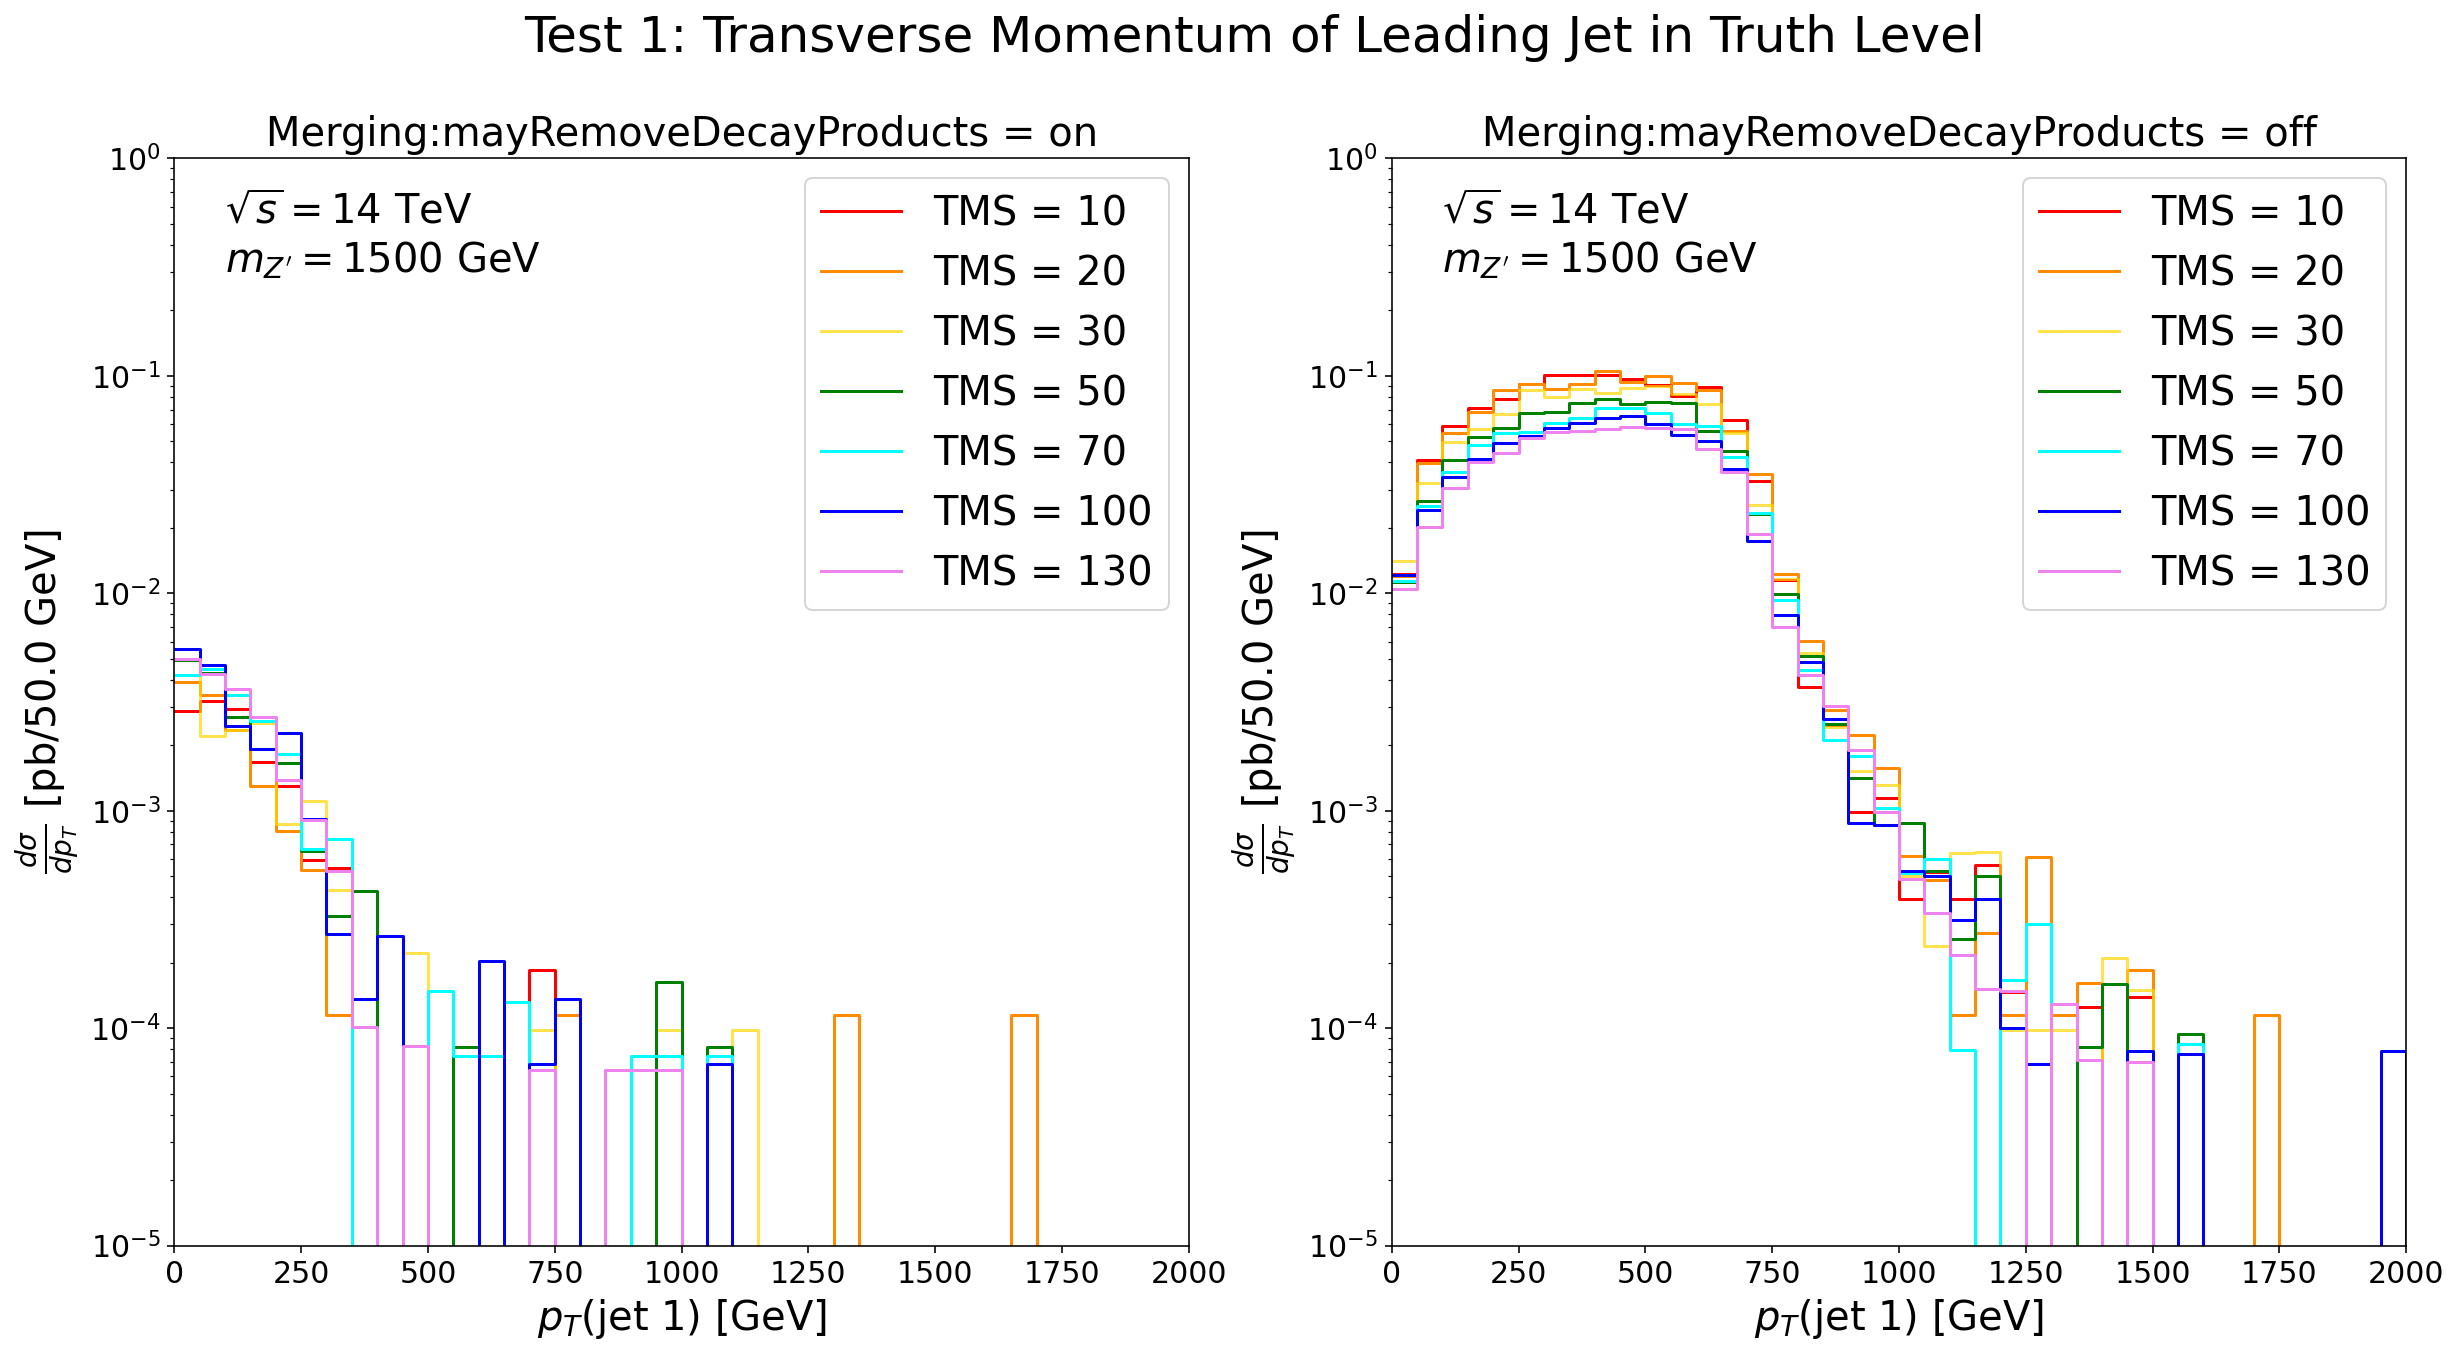

In [10]:
# 1. Figure
fig2_1, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 101)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(truth_jet_filterDM_8_10[4], bins=binning, weights=weight_8_10[s_t_j_fDM_8_10])
hist0_2, bins0_2 = np.histogram(truth_jet_filterDM_8_20[4], bins=binning, weights=weight_8_20[s_t_j_fDM_8_20])
hist0_3, bins0_3 = np.histogram(truth_jet_filterDM_8_30[4], bins=binning, weights=weight_8_30[s_t_j_fDM_8_30])
hist0_4, bins0_4 = np.histogram(truth_jet_filterDM_8_50[4], bins=binning, weights=weight_8_50[s_t_j_fDM_8_50])
hist0_5, bins0_5 = np.histogram(truth_jet_filterDM_8_70[4], bins=binning, weights=weight_8_70[s_t_j_fDM_8_70])
hist0_6, bins0_6 = np.histogram(truth_jet_filterDM_8_100[4], bins=binning, weights=weight_8_100[s_t_j_fDM_8_100])
hist0_7, bins0_7 = np.histogram(truth_jet_filterDM_8_130[4], bins=binning, weights=weight_8_130[s_t_j_fDM_8_130])

hist1_1, bins1_1 = np.histogram(truth_jet_filterDM_4_10[4], bins=binning, weights=weight_4_10[s_t_j_fDM_4_10])
hist1_2, bins1_2 = np.histogram(truth_jet_filterDM_4_20[4], bins=binning, weights=weight_4_20[s_t_j_fDM_4_20])
hist1_3, bins1_3 = np.histogram(truth_jet_filterDM_4_30[4], bins=binning, weights=weight_4_30[s_t_j_fDM_4_30])
hist1_4, bins1_4 = np.histogram(truth_jet_filterDM_4_50[4], bins=binning, weights=weight_4_50[s_t_j_fDM_4_50])
hist1_5, bins1_5 = np.histogram(truth_jet_filterDM_4_70[4], bins=binning, weights=weight_4_70[s_t_j_fDM_4_70])
hist1_6, bins1_6 = np.histogram(truth_jet_filterDM_4_100[4], bins=binning, weights=weight_4_100[s_t_j_fDM_4_100])
hist1_7, bins1_7 = np.histogram(truth_jet_filterDM_4_130[4], bins=binning, weights=weight_4_130[s_t_j_fDM_4_130])

# 3. Plot
axs[0].step(bins0_1[:-1], hist0_1, where='post', color='red', label="TMS = 10")
axs[0].step(bins0_2[:-1], hist0_2, where='post', color='darkorange', label="TMS = 20")
axs[0].step(bins0_3[:-1], hist0_3, where='post', color='gold', alpha=0.7, label="TMS = 30")
axs[0].step(bins0_4[:-1], hist0_4, where='post', color='green', label="TMS = 50")
axs[0].step(bins0_5[:-1], hist0_5, where='post', color='cyan', label="TMS = 70")
axs[0].step(bins0_6[:-1], hist0_6, where='post', color='blue', label="TMS = 100")
axs[0].step(bins0_7[:-1], hist0_7, where='post', color='violet', label="TMS = 130")

axs[1].step(bins1_1[:-1], hist1_1, where='post', color='red', label="TMS = 10")
axs[1].step(bins1_2[:-1], hist1_2, where='post', color='darkorange', label="TMS = 20")
axs[1].step(bins1_3[:-1], hist1_3, where='post', color='gold', alpha=0.7, label="TMS = 30")
axs[1].step(bins1_4[:-1], hist1_4, where='post', color='green', label="TMS = 50")
axs[1].step(bins1_5[:-1], hist1_5, where='post', color='cyan', label="TMS = 70")
axs[1].step(bins1_6[:-1], hist1_6, where='post', color='blue', label="TMS = 100")
axs[1].step(bins1_7[:-1], hist1_7, where='post', color='violet', label="TMS = 130")

# 4. axes setting
# title and legend
fig2_1.suptitle("Test 1: Transverse Momentum of Leading Jet in Truth Level", fontsize=25)
axs[0].legend(fontsize=20)
axs[1].legend(fontsize=20)
# sub-title and x & y labels
ylabel = "$\\frac{d\sigma}{dp_T}$ [pb/"+str(binning[-1]/(len(binning)-1))+" GeV]"
axs[0].set_title("Merging:mayRemoveDecayProducts = on", fontsize=20)
axs[0].set_xlabel("$p_T$(jet 1) [GeV]", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("Merging:mayRemoveDecayProducts = off", fontsize=20)
axs[1].set_xlabel("$p_T$(jet 1) [GeV]", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(0, 2000)
axs[0].set_ylim(1/100000, 1)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[1].set_xlim(0, 2000)
axs[1].set_ylim(1/100000, 1)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

# 5. text
tex1 = "$\sqrt{s} = 14$ TeV"
tex2 = "$\mathcal{L} = $"+str(int(LUMINOSITY/1000))+" $\mathrm{fb}^{-1}$"
tex3 = "$m_{Z^\prime} = 1500$ GeV"
axs[0].text(100, 0.5, tex1, fontsize=20)
# axs[0].text(100, 0.3, tex2, fontsize=20)
axs[0].text(100, 0.3, tex3, fontsize=20)
axs[1].text(100, 0.5, tex1, fontsize=20)
# axs[1].text(100, 0.3, tex2, fontsize=20)
axs[1].text(100, 0.3, tex3, fontsize=20)

plt.savefig("figures-1/fig2-1_jT_mRDP_on_off_pT.pdf")
plt.show()

In [11]:
print("Merging:mayRemoveDecayProducts = on:")
print("tms = 10, Cross-section = {} pb".format(np.sum(hist0_1)[0]))
print("tms = 20, Cross-section = {} pb".format(np.sum(hist0_2)[0]))
print("tms = 30, Cross-section = {} pb".format(np.sum(hist0_3)[0]))
print("tms = 50, Cross-section = {} pb".format(np.sum(hist0_4)[0]))
print("tms = 70, Cross-section = {} pb".format(np.sum(hist0_5)[0]))
print("tms = 100, Cross-section = {} pb".format(np.sum(hist0_6)[0]))
print("tms = 130, Cross-section = {} pb".format(np.sum(hist0_7)[0]))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("tms = 10, Cross-section = {} pb".format(np.sum(hist1_1)[0]))
print("tms = 20, Cross-section = {} pb".format(np.sum(hist1_2)[0]))
print("tms = 30, Cross-section = {} pb".format(np.sum(hist1_3)[0]))
print("tms = 50, Cross-section = {} pb".format(np.sum(hist1_4)[0]))
print("tms = 70, Cross-section = {} pb".format(np.sum(hist1_5)[0]))
print("tms = 100, Cross-section = {} pb".format(np.sum(hist1_6)[0]))
print("tms = 130, Cross-section = {} pb".format(np.sum(hist1_7)[0]))

Merging:mayRemoveDecayProducts = on:
tms = 10, Cross-section = 0.013294792458769245 pb
tms = 20, Cross-section = 0.012788425659692078 pb
tms = 30, Cross-section = 0.014194997126793386 pb
tms = 50, Cross-section = 0.017210953121666803 pb
tms = 70, Cross-section = 0.0185666262298898 pb
tms = 100, Cross-section = 0.018940151320413507 pb
tms = 130, Cross-section = 0.018787995681793235 pb
Merging:mayRemoveDecayProducts = off:
tms = 10, Cross-section = 1.130250440487682 pb
tms = 20, Cross-section = 1.1259142258591746 pb
tms = 30, Cross-section = 0.9949907200851209 pb
tms = 50, Cross-section = 0.8489344991817431 pb
tms = 70, Cross-section = 0.7707402087429973 pb
tms = 100, Cross-section = 0.6992070931169841 pb
tms = 130, Cross-section = 0.656665126836069 pb


#### Conclusion: The cross-sections have no problem.

#### 2. $M(jj)$ for mRDP = on/off

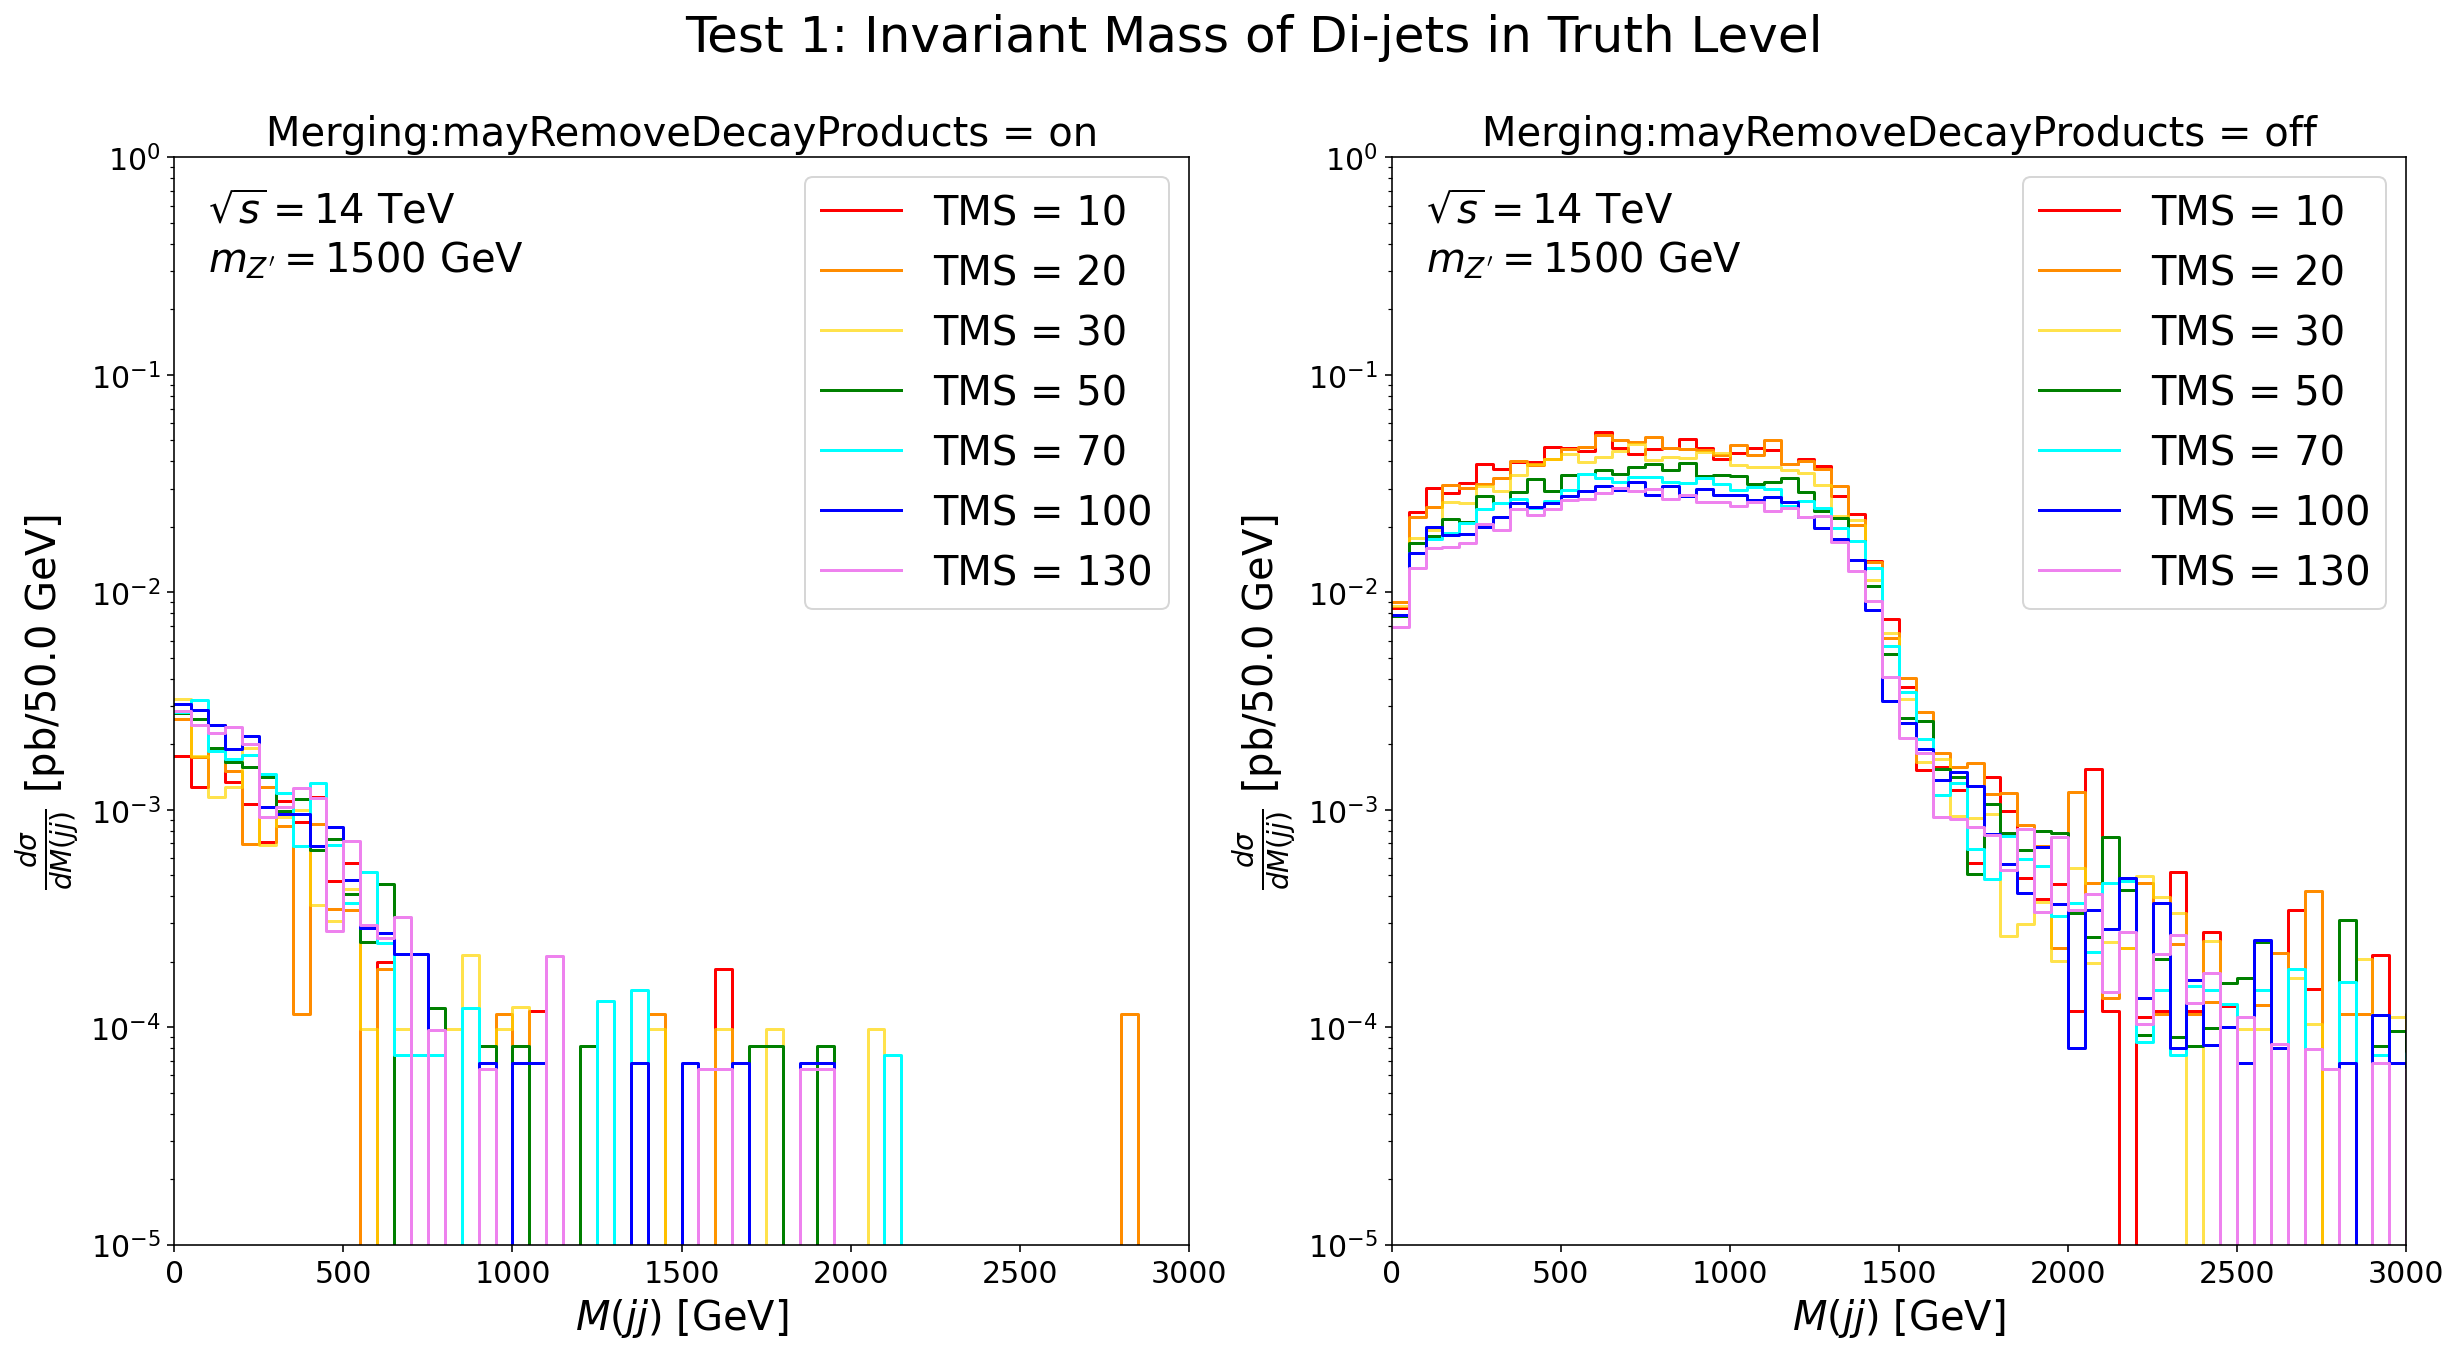

In [12]:
# 1. Figure
fig2_2, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 101)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(truth_jet_filterDM_8_10[0], bins=binning, weights=weight_8_10[s_t_j_fDM_8_10])
hist0_2, bins0_2 = np.histogram(truth_jet_filterDM_8_20[0], bins=binning, weights=weight_8_20[s_t_j_fDM_8_20])
hist0_3, bins0_3 = np.histogram(truth_jet_filterDM_8_30[0], bins=binning, weights=weight_8_30[s_t_j_fDM_8_30])
hist0_4, bins0_4 = np.histogram(truth_jet_filterDM_8_50[0], bins=binning, weights=weight_8_50[s_t_j_fDM_8_50])
hist0_5, bins0_5 = np.histogram(truth_jet_filterDM_8_70[0], bins=binning, weights=weight_8_70[s_t_j_fDM_8_70])
hist0_6, bins0_6 = np.histogram(truth_jet_filterDM_8_100[0], bins=binning, weights=weight_8_100[s_t_j_fDM_8_100])
hist0_7, bins0_7 = np.histogram(truth_jet_filterDM_8_130[0], bins=binning, weights=weight_8_130[s_t_j_fDM_8_130])

hist1_1, bins1_1 = np.histogram(truth_jet_filterDM_4_10[0], bins=binning, weights=weight_4_10[s_t_j_fDM_4_10])
hist1_2, bins1_2 = np.histogram(truth_jet_filterDM_4_20[0], bins=binning, weights=weight_4_20[s_t_j_fDM_4_20])
hist1_3, bins1_3 = np.histogram(truth_jet_filterDM_4_30[0], bins=binning, weights=weight_4_30[s_t_j_fDM_4_30])
hist1_4, bins1_4 = np.histogram(truth_jet_filterDM_4_50[0], bins=binning, weights=weight_4_50[s_t_j_fDM_4_50])
hist1_5, bins1_5 = np.histogram(truth_jet_filterDM_4_70[0], bins=binning, weights=weight_4_70[s_t_j_fDM_4_70])
hist1_6, bins1_6 = np.histogram(truth_jet_filterDM_4_100[0], bins=binning, weights=weight_4_100[s_t_j_fDM_4_100])
hist1_7, bins1_7 = np.histogram(truth_jet_filterDM_4_130[0], bins=binning, weights=weight_4_130[s_t_j_fDM_4_130])

# 3. Plot
axs[0].step(bins0_1[:-1], hist0_1, where='post', color='red', label="TMS = 10")
axs[0].step(bins0_2[:-1], hist0_2, where='post', color='darkorange', label="TMS = 20")
axs[0].step(bins0_3[:-1], hist0_3, where='post', color='gold', alpha=0.7, label="TMS = 30")
axs[0].step(bins0_4[:-1], hist0_4, where='post', color='green', label="TMS = 50")
axs[0].step(bins0_5[:-1], hist0_5, where='post', color='cyan', label="TMS = 70")
axs[0].step(bins0_6[:-1], hist0_6, where='post', color='blue', label="TMS = 100")
axs[0].step(bins0_7[:-1], hist0_7, where='post', color='violet', label="TMS = 130")

axs[1].step(bins1_1[:-1], hist1_1, where='post', color='red', label="TMS = 10")
axs[1].step(bins1_2[:-1], hist1_2, where='post', color='darkorange', label="TMS = 20")
axs[1].step(bins1_3[:-1], hist1_3, where='post', color='gold', alpha=0.7, label="TMS = 30")
axs[1].step(bins1_4[:-1], hist1_4, where='post', color='green', label="TMS = 50")
axs[1].step(bins1_5[:-1], hist1_5, where='post', color='cyan', label="TMS = 70")
axs[1].step(bins1_6[:-1], hist1_6, where='post', color='blue', label="TMS = 100")
axs[1].step(bins1_7[:-1], hist1_7, where='post', color='violet', label="TMS = 130")

# 4. axes setting
# title and legend
fig2_2.suptitle("Test 1: Invariant Mass of Di-jets in Truth Level", fontsize=25)
axs[0].legend(fontsize=20)
axs[1].legend(fontsize=20)
# sub-title and x & y labels
ylabel = "$\\frac{d\sigma}{dM(jj)}$ [pb/"+str(binning[-1]/(len(binning)-1))+" GeV]"
axs[0].set_title("Merging:mayRemoveDecayProducts = on", fontsize=20)
axs[0].set_xlabel("$M(jj)$ [GeV]", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("Merging:mayRemoveDecayProducts = off", fontsize=20)
axs[1].set_xlabel("$M(jj)$ [GeV]", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(0, 3000)
axs[0].set_ylim(1/100000, 1)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[1].set_xlim(0, 3000)
axs[1].set_ylim(1/100000, 1)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

# 5. text
tex1 = "$\sqrt{s} = 14$ TeV"
tex2 = "$\mathcal{L} = $"+str(int(LUMINOSITY/1000))+" $\mathrm{fb}^{-1}$"
tex3 = "$m_{Z^\prime} = 1500$ GeV"
axs[0].text(100, 0.5, tex1, fontsize=20)
# axs[0].text(100, 0.3, tex2, fontsize=20)
axs[0].text(100, 0.3, tex3, fontsize=20)
axs[1].text(100, 0.5, tex1, fontsize=20)
# axs[1].text(100, 0.3, tex2, fontsize=20)
axs[1].text(100, 0.3, tex3, fontsize=20)

plt.savefig("figures-1/fig2-2_jT_mRDP_on_off_Mjj.pdf")
plt.show()

In [13]:
print("Merging:mayRemoveDecayProducts = on:")
print("tms = 10, Cross-section = {} pb".format(np.sum(hist0_1)[0]))
print("tms = 20, Cross-section = {} pb".format(np.sum(hist0_2)[0]))
print("tms = 30, Cross-section = {} pb".format(np.sum(hist0_3)[0]))
print("tms = 50, Cross-section = {} pb".format(np.sum(hist0_4)[0]))
print("tms = 70, Cross-section = {} pb".format(np.sum(hist0_5)[0]))
print("tms = 100, Cross-section = {} pb".format(np.sum(hist0_6)[0]))
print("tms = 130, Cross-section = {} pb".format(np.sum(hist0_7)[0]))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("tms = 10, Cross-section = {} pb".format(np.sum(hist1_1)[0]))
print("tms = 20, Cross-section = {} pb".format(np.sum(hist1_2)[0]))
print("tms = 30, Cross-section = {} pb".format(np.sum(hist1_3)[0]))
print("tms = 50, Cross-section = {} pb".format(np.sum(hist1_4)[0]))
print("tms = 70, Cross-section = {} pb".format(np.sum(hist1_5)[0]))
print("tms = 100, Cross-section = {} pb".format(np.sum(hist1_6)[0]))
print("tms = 130, Cross-section = {} pb".format(np.sum(hist1_7)[0]))

Merging:mayRemoveDecayProducts = on:
tms = 10, Cross-section = 0.013294792458769245 pb
tms = 20, Cross-section = 0.012788425659692078 pb
tms = 30, Cross-section = 0.014194997126793386 pb
tms = 50, Cross-section = 0.017210953121666803 pb
tms = 70, Cross-section = 0.0185666262298898 pb
tms = 100, Cross-section = 0.018940151320413507 pb
tms = 130, Cross-section = 0.018787995681793235 pb
Merging:mayRemoveDecayProducts = off:
tms = 10, Cross-section = 1.1302504404876794 pb
tms = 20, Cross-section = 1.1259142258591806 pb
tms = 30, Cross-section = 0.9949907200851198 pb
tms = 50, Cross-section = 0.8489344991817439 pb
tms = 70, Cross-section = 0.7707402087429984 pb
tms = 100, Cross-section = 0.6992070931169845 pb
tms = 130, Cross-section = 0.6566651268360694 pb


#### Conclusion: The cross-sections have no problem.

#### 3. $MET$ for mRDP = on/off

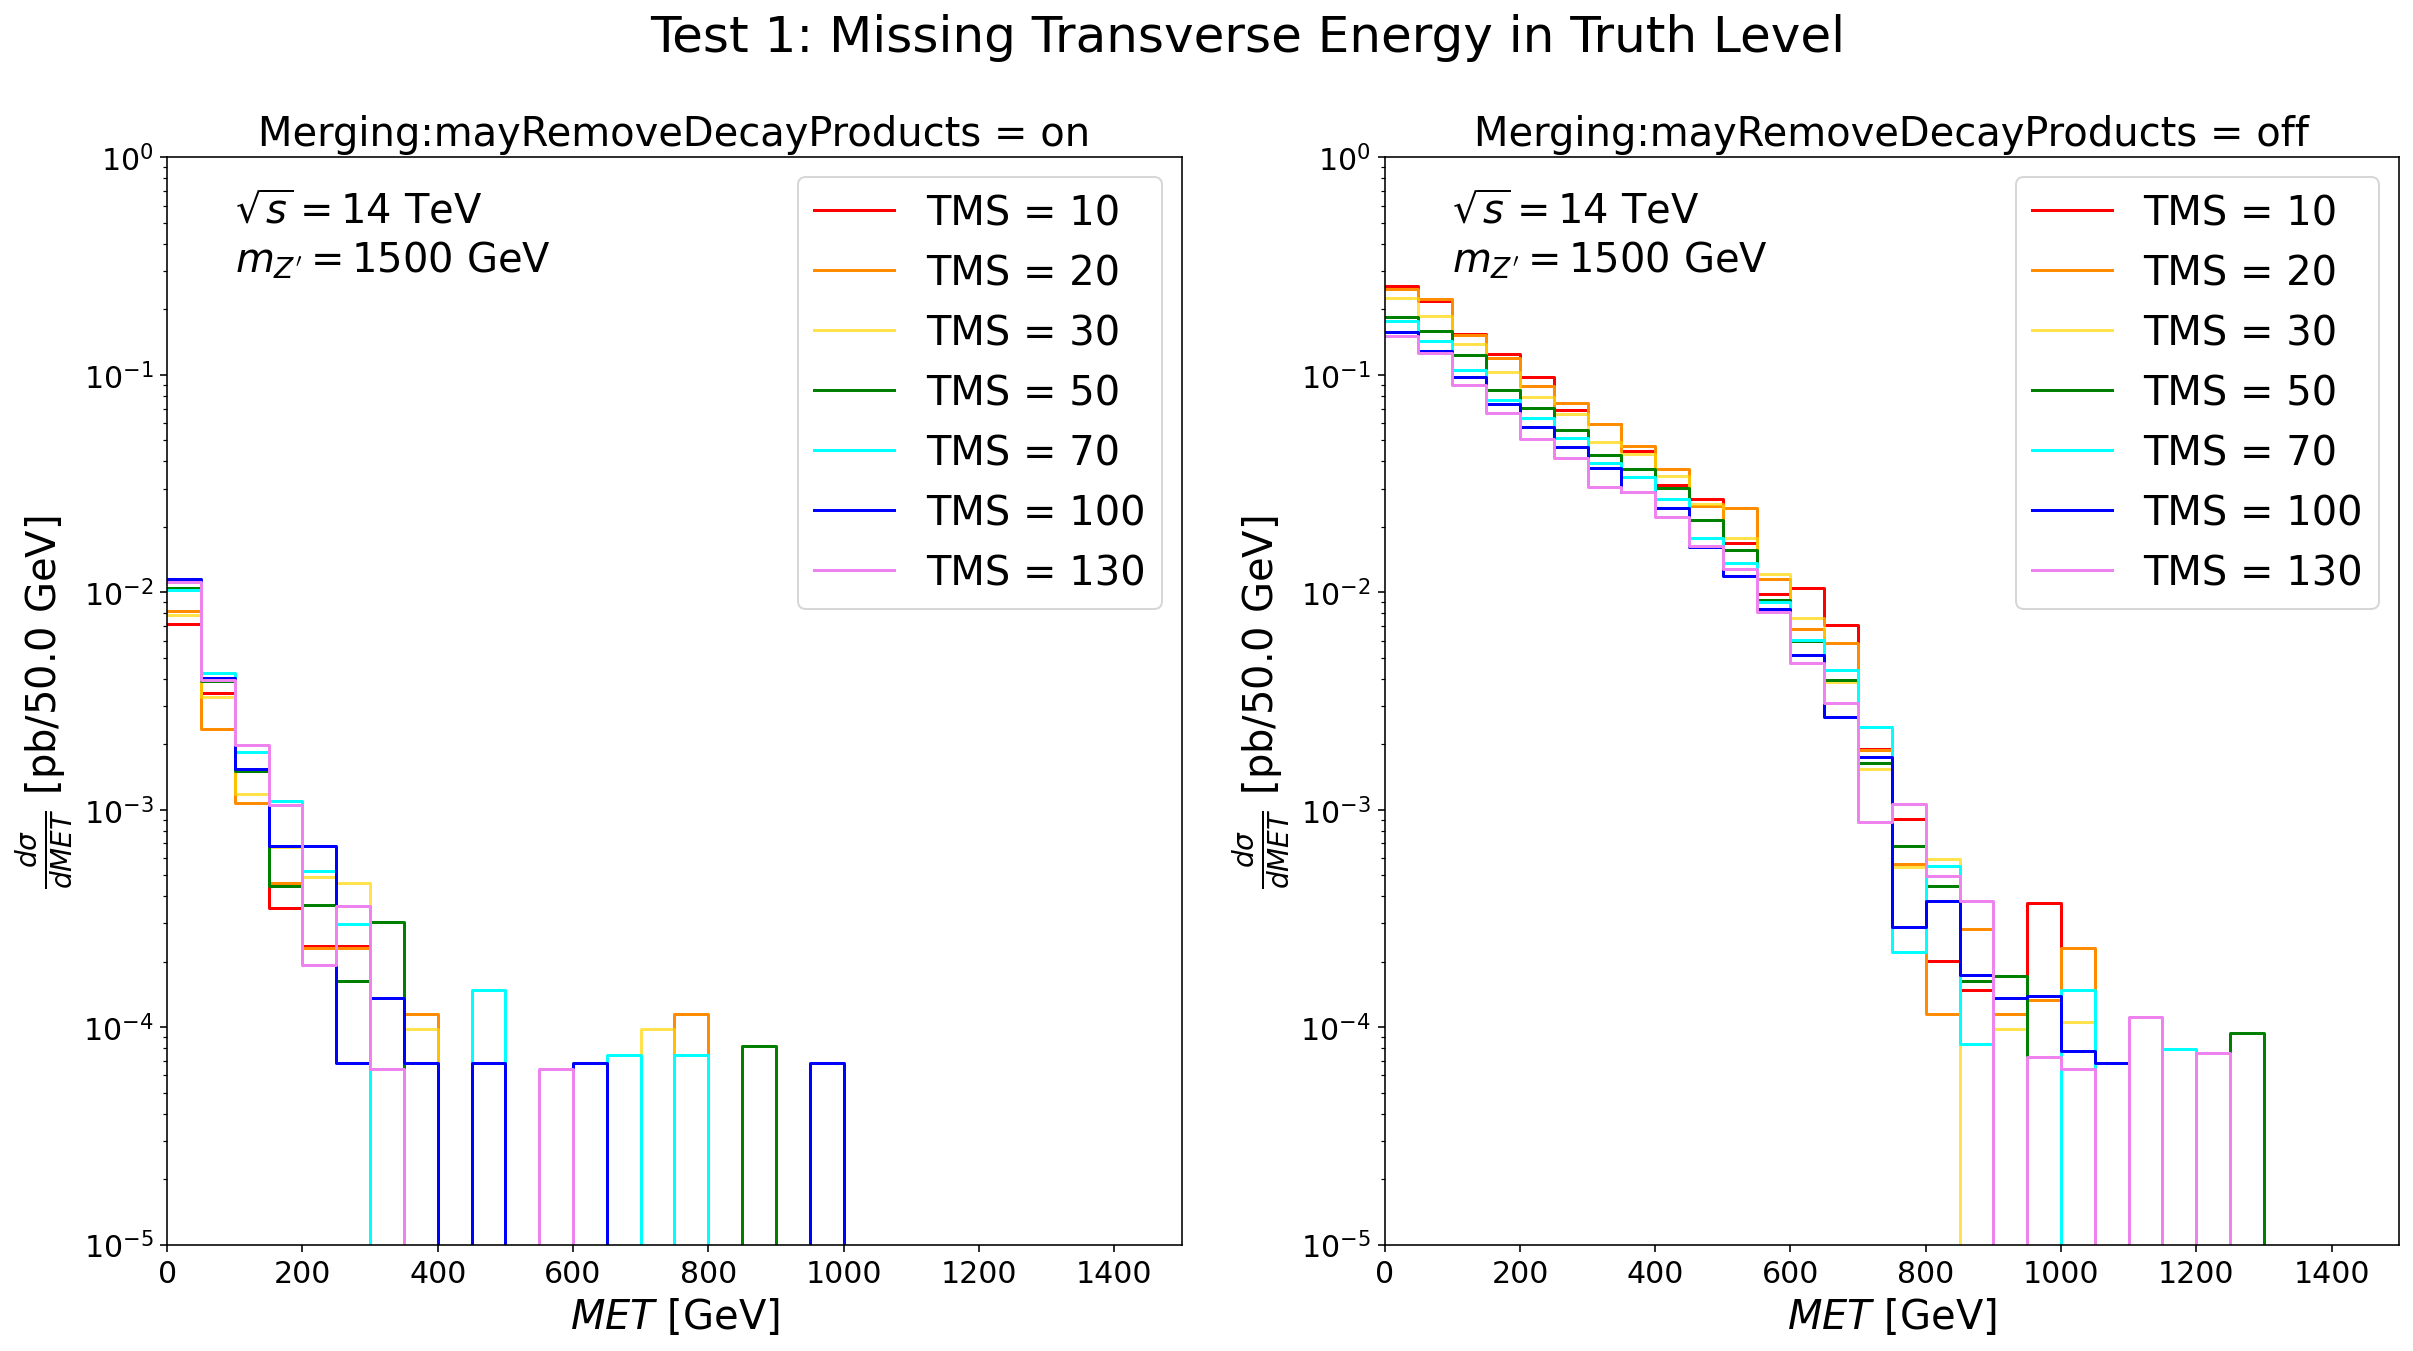

In [15]:
# 1. Figure
fig2_3, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 101)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(truth_MET_8_10[0], bins=binning, weights=weight_8_10[s_t_MET_8_10])
hist0_2, bins0_2 = np.histogram(truth_MET_8_20[0], bins=binning, weights=weight_8_20[s_t_MET_8_20])
hist0_3, bins0_3 = np.histogram(truth_MET_8_30[0], bins=binning, weights=weight_8_30[s_t_MET_8_30])
hist0_4, bins0_4 = np.histogram(truth_MET_8_50[0], bins=binning, weights=weight_8_50[s_t_MET_8_50])
hist0_5, bins0_5 = np.histogram(truth_MET_8_70[0], bins=binning, weights=weight_8_70[s_t_MET_8_70])
hist0_6, bins0_6 = np.histogram(truth_MET_8_100[0], bins=binning, weights=weight_8_100[s_t_MET_8_100])
hist0_7, bins0_7 = np.histogram(truth_MET_8_130[0], bins=binning, weights=weight_8_130[s_t_MET_8_130])

hist1_1, bins1_1 = np.histogram(truth_MET_4_10[0], bins=binning, weights=weight_4_10[s_t_MET_4_10])
hist1_2, bins1_2 = np.histogram(truth_MET_4_20[0], bins=binning, weights=weight_4_20[s_t_MET_4_20])
hist1_3, bins1_3 = np.histogram(truth_MET_4_30[0], bins=binning, weights=weight_4_30[s_t_MET_4_30])
hist1_4, bins1_4 = np.histogram(truth_MET_4_50[0], bins=binning, weights=weight_4_50[s_t_MET_4_50])
hist1_5, bins1_5 = np.histogram(truth_MET_4_70[0], bins=binning, weights=weight_4_70[s_t_MET_4_70])
hist1_6, bins1_6 = np.histogram(truth_MET_4_100[0], bins=binning, weights=weight_4_100[s_t_MET_4_100])
hist1_7, bins1_7 = np.histogram(truth_MET_4_130[0], bins=binning, weights=weight_4_130[s_t_MET_4_130])

# 3. Plot
axs[0].step(bins0_1[:-1], hist0_1, where='post', color='red', label="TMS = 10")
axs[0].step(bins0_2[:-1], hist0_2, where='post', color='darkorange', label="TMS = 20")
axs[0].step(bins0_3[:-1], hist0_3, where='post', color='gold', alpha=0.7, label="TMS = 30")
axs[0].step(bins0_4[:-1], hist0_4, where='post', color='green', label="TMS = 50")
axs[0].step(bins0_5[:-1], hist0_5, where='post', color='cyan', label="TMS = 70")
axs[0].step(bins0_6[:-1], hist0_6, where='post', color='blue', label="TMS = 100")
axs[0].step(bins0_7[:-1], hist0_7, where='post', color='violet', label="TMS = 130")

axs[1].step(bins1_1[:-1], hist1_1, where='post', color='red', label="TMS = 10")
axs[1].step(bins1_2[:-1], hist1_2, where='post', color='darkorange', label="TMS = 20")
axs[1].step(bins1_3[:-1], hist1_3, where='post', color='gold', alpha=0.7, label="TMS = 30")
axs[1].step(bins1_4[:-1], hist1_4, where='post', color='green', label="TMS = 50")
axs[1].step(bins1_5[:-1], hist1_5, where='post', color='cyan', label="TMS = 70")
axs[1].step(bins1_6[:-1], hist1_6, where='post', color='blue', label="TMS = 100")
axs[1].step(bins1_7[:-1], hist1_7, where='post', color='violet', label="TMS = 130")

# 4. axes setting
# title and legend
fig2_3.suptitle("Test 1: Missing Transverse Energy in Truth Level", fontsize=25)
axs[0].legend(fontsize=20)
axs[1].legend(fontsize=20)
# sub-title and x & y labels
ylabel = "$\\frac{d\sigma}{dMET}$ [pb/"+str(binning[-1]/(len(binning)-1))+" GeV]"
axs[0].set_title("Merging:mayRemoveDecayProducts = on", fontsize=20)
axs[0].set_xlabel("$MET$ [GeV]", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("Merging:mayRemoveDecayProducts = off", fontsize=20)
axs[1].set_xlabel("$MET$ [GeV]", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(0, 1500)
axs[0].set_ylim(1/100000, 1)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[1].set_xlim(0, 1500)
axs[1].set_ylim(1/100000, 1)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

# 5. text
tex1 = "$\sqrt{s} = 14$ TeV"
tex2 = "$\mathcal{L} = $"+str(int(LUMINOSITY/1000))+" $\mathrm{fb}^{-1}$"
tex3 = "$m_{Z^\prime} = 1500$ GeV"
axs[0].text(100, 0.5, tex1, fontsize=20)
# axs[0].text(100, 0.3, tex2, fontsize=20)
axs[0].text(100, 0.3, tex3, fontsize=20)
axs[1].text(100, 0.5, tex1, fontsize=20)
# axs[1].text(100, 0.3, tex2, fontsize=20)
axs[1].text(100, 0.3, tex3, fontsize=20)

plt.savefig("figures-1/fig2-3_jT_mRDP_on_off_MET.pdf")
plt.show()

In [16]:
print("Merging:mayRemoveDecayProducts = on:")
print("tms = 10, Cross-section = {} pb".format(np.sum(hist0_1)[0]))
print("tms = 20, Cross-section = {} pb".format(np.sum(hist0_2)[0]))
print("tms = 30, Cross-section = {} pb".format(np.sum(hist0_3)[0]))
print("tms = 50, Cross-section = {} pb".format(np.sum(hist0_4)[0]))
print("tms = 70, Cross-section = {} pb".format(np.sum(hist0_5)[0]))
print("tms = 100, Cross-section = {} pb".format(np.sum(hist0_6)[0]))
print("tms = 130, Cross-section = {} pb".format(np.sum(hist0_7)[0]))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("tms = 10, Cross-section = {} pb".format(np.sum(hist1_1)[0]))
print("tms = 20, Cross-section = {} pb".format(np.sum(hist1_2)[0]))
print("tms = 30, Cross-section = {} pb".format(np.sum(hist1_3)[0]))
print("tms = 50, Cross-section = {} pb".format(np.sum(hist1_4)[0]))
print("tms = 70, Cross-section = {} pb".format(np.sum(hist1_5)[0]))
print("tms = 100, Cross-section = {} pb".format(np.sum(hist1_6)[0]))
print("tms = 130, Cross-section = {} pb".format(np.sum(hist1_7)[0]))

Merging:mayRemoveDecayProducts = on:
tms = 10, Cross-section = 0.013294792458769245 pb
tms = 20, Cross-section = 0.012788425659692078 pb
tms = 30, Cross-section = 0.014194997126793386 pb
tms = 50, Cross-section = 0.017210953121666803 pb
tms = 70, Cross-section = 0.0185666262298898 pb
tms = 100, Cross-section = 0.018940151320413507 pb
tms = 130, Cross-section = 0.018787995681793235 pb
Merging:mayRemoveDecayProducts = off:
tms = 10, Cross-section = 1.1302504404876794 pb
tms = 20, Cross-section = 1.1259142258591752 pb
tms = 30, Cross-section = 0.994990720085121 pb
tms = 50, Cross-section = 0.8489344991817425 pb
tms = 70, Cross-section = 0.7707402087429979 pb
tms = 100, Cross-section = 0.6992070931169851 pb
tms = 130, Cross-section = 0.6566651268360696 pb


#### Conclusion: The cross-sections have no problem.

### 3-3. Event weight distribution

#### 1. Event weight for mRDP = on/off

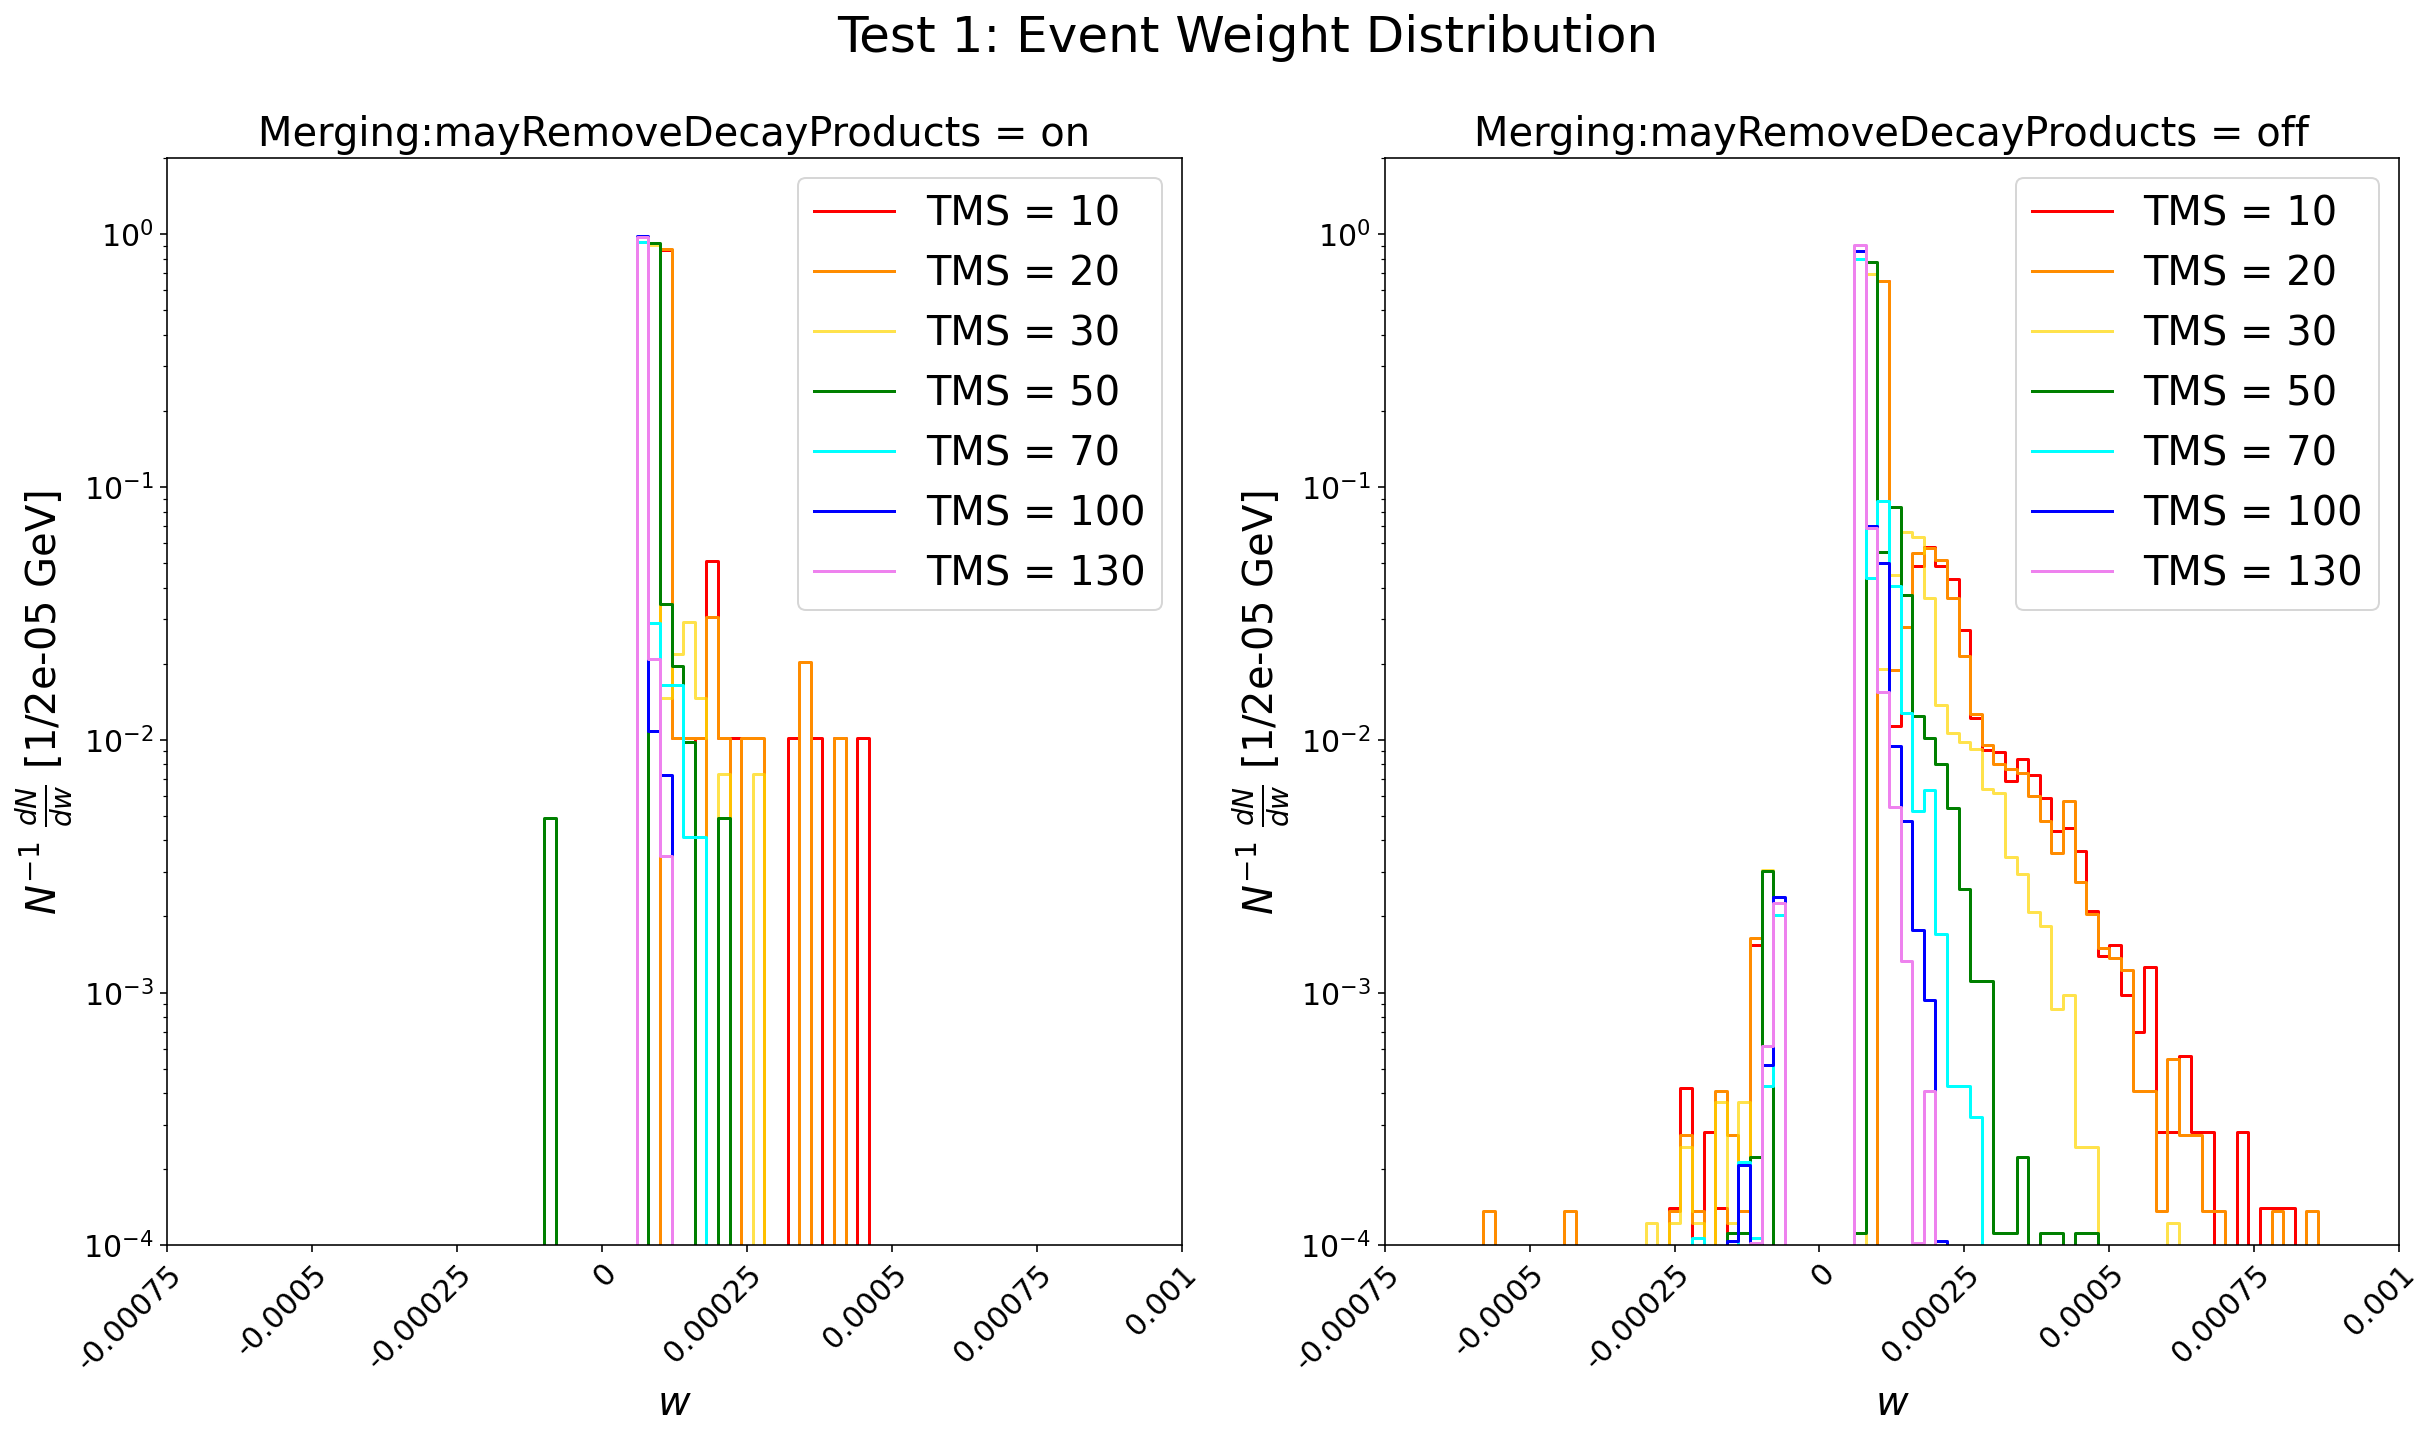

In [17]:
# 1. Figure
fig3_1, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(-0.002, 0.002, 201)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(weight_8_10, bins=binning)
hist0_2, bins0_2 = np.histogram(weight_8_20, bins=binning)
hist0_3, bins0_3 = np.histogram(weight_8_30, bins=binning)
hist0_4, bins0_4 = np.histogram(weight_8_50, bins=binning)
hist0_5, bins0_5 = np.histogram(weight_8_70, bins=binning)
hist0_6, bins0_6 = np.histogram(weight_8_100, bins=binning)
hist0_7, bins0_7 = np.histogram(weight_8_130, bins=binning)

hist1_1, bins1_1 = np.histogram(weight_4_10, bins=binning)
hist1_2, bins1_2 = np.histogram(weight_4_20, bins=binning)
hist1_3, bins1_3 = np.histogram(weight_4_30, bins=binning)
hist1_4, bins1_4 = np.histogram(weight_4_50, bins=binning)
hist1_5, bins1_5 = np.histogram(weight_4_70, bins=binning)
hist1_6, bins1_6 = np.histogram(weight_4_100, bins=binning)
hist1_7, bins1_7 = np.histogram(weight_4_130, bins=binning)

# 3. Plot
axs[0].step(bins0_1[:-1], hist0_1/np.sum(hist0_1), where='post', color='red', label="TMS = 10")
axs[0].step(bins0_2[:-1], hist0_2/np.sum(hist0_2), where='post', color='darkorange', label="TMS = 20")
axs[0].step(bins0_3[:-1], hist0_3/np.sum(hist0_3), where='post', color='gold', alpha=0.7, label="TMS = 30")
axs[0].step(bins0_4[:-1], hist0_4/np.sum(hist0_4), where='post', color='green', label="TMS = 50")
axs[0].step(bins0_5[:-1], hist0_5/np.sum(hist0_5), where='post', color='cyan', label="TMS = 70")
axs[0].step(bins0_6[:-1], hist0_6/np.sum(hist0_6), where='post', color='blue', label="TMS = 100")
axs[0].step(bins0_7[:-1], hist0_7/np.sum(hist0_7), where='post', color='violet', label="TMS = 130")

axs[1].step(bins1_1[:-1], hist1_1/np.sum(hist1_1), where='post', color='red', label="TMS = 10")
axs[1].step(bins1_2[:-1], hist1_2/np.sum(hist1_2), where='post', color='darkorange', label="TMS = 20")
axs[1].step(bins1_3[:-1], hist1_3/np.sum(hist1_3), where='post', color='gold', alpha=0.7, label="TMS = 30")
axs[1].step(bins1_4[:-1], hist1_4/np.sum(hist1_4), where='post', color='green', label="TMS = 50")
axs[1].step(bins1_5[:-1], hist1_5/np.sum(hist1_5), where='post', color='cyan', label="TMS = 70")
axs[1].step(bins1_6[:-1], hist1_6/np.sum(hist1_6), where='post', color='blue', label="TMS = 100")
axs[1].step(bins1_7[:-1], hist1_7/np.sum(hist1_7), where='post', color='violet', label="TMS = 130")

# 4. axes setting
# title and legend
fig3_1.suptitle("Test 1: Event Weight Distribution", fontsize=25)
axs[0].legend(fontsize=20)
axs[1].legend(fontsize=20)
# sub-title and x & y labels
ylabel = "$N^{-1}\ \\frac{dN}{dw}$ [1/"+str((binning[-1]-binning[0])/(len(binning)-1))+" GeV]"
axs[0].set_title("Merging:mayRemoveDecayProducts = on", fontsize=20)
axs[0].set_xlabel("$w$", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("Merging:mayRemoveDecayProducts = off", fontsize=20)
axs[1].set_xlabel("$w$", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(-0.00075, 0.001)
axs[0].set_ylim(1/10000, 2)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[0].set_xticks([-0.00075, -0.0005, -0.00025, 0.,
                   0.00025, 0.0005, 0.00075, 0.001])
xticklabels_0 = ["-0.00075", "-0.0005", "-0.00025", "$0$",
                 "0.00025", "0.0005", "0.00075", "0.001"]
axs[0].set_xticklabels(xticklabels_0)
axs[1].set_xlim(-0.00075, 0.001)
axs[1].set_ylim(1/10000, 2)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)
axs[1].set_xticks([-0.00075, -0.0005, -0.00025, 0.,
                   0.00025, 0.0005, 0.00075, 0.001])
xticklabels_1 = ["-0.00075", "-0.0005", "-0.00025", "$0$",
                 "0.00025", "0.0005", "0.00075", "0.001"]
axs[1].set_xticklabels(xticklabels_1)
# Rotate the tick labels and set their alignment.
plt.setp(axs[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(axs[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.savefig("figures-1/fig3-1_weight_mRDP_on_off.pdf")
plt.show()

In [18]:
print("Merging:mayRemoveDecayProducts = on:")
print("tms = 10, Number of events = {}".format(np.sum(hist0_1)))
print("tms = 20, Number of events = {}".format(np.sum(hist0_2)))
print("tms = 30, Number of events = {}".format(np.sum(hist0_3)))
print("tms = 50, Number of events = {}".format(np.sum(hist0_4)))
print("tms = 70, Number of events = {}".format(np.sum(hist0_5)))
print("tms = 100, Number of events = {}".format(np.sum(hist0_6)))
print("tms = 130, Number of events = {}".format(np.sum(hist0_7)))
print('='*50)
print("Merging:mayRemoveDecayProducts = off:")
print("tms = 10, Number of events = {}".format(np.sum(hist1_1)))
print("tms = 20, Number of events = {}".format(np.sum(hist1_2)))
print("tms = 30, Number of events = {}".format(np.sum(hist1_3)))
print("tms = 50, Number of events = {}".format(np.sum(hist1_4)))
print("tms = 70, Number of events = {}".format(np.sum(hist1_5)))
print("tms = 100, Number of events = {}".format(np.sum(hist1_6)))
print("tms = 130, Number of events = {}".format(np.sum(hist1_7)))

Merging:mayRemoveDecayProducts = on:
tms = 10, Number of events = 98
tms = 20, Number of events = 98
tms = 30, Number of events = 137
tms = 50, Number of events = 204
tms = 70, Number of events = 242
tms = 100, Number of events = 276
tms = 130, Number of events = 288
Merging:mayRemoveDecayProducts = off:
tms = 10, Number of events = 7138
tms = 20, Number of events = 7322
tms = 30, Number of events = 8148
tms = 50, Number of events = 8957
tms = 70, Number of events = 9353
tms = 100, Number of events = 9637
tms = 130, Number of events = 9760


#### Conclusion: The area of distributions is correct!

### 3-4. Check event weight

In [19]:
for i in range(len(weight_4_10)):
    if weight_4_10[i][0] <= 0:
        print(i, weight_4_10[i])

19 [-0.00019994]
109 [-0.00011809]
400 [-0.00011809]
983 [-0.00011809]
1180 [-0.00011809]
1481 [-0.00011809]
1786 [-0.00022858]
2528 [-0.00023031]
2682 [-0.00019732]
4158 [-0.00024208]
4172 [-0.00011809]
4355 [-0.00011809]
5470 [-0.00016933]
5601 [-0.00011809]
5666 [-0.00011809]
6099 [-0.00022542]
6372 [-0.00011809]
6755 [-0.00011809]


In [20]:
for i in range(len(weight_4_70)):
    if weight_4_70[i][0] <= 0:
        print(i, weight_4_70[i])

504 [-7.41662387e-05]
1991 [-7.41662387e-05]
2341 [-7.41662387e-05]
3163 [-9.68799829e-05]
3273 [-7.41662387e-05]
4243 [-9.09570271e-05]
4374 [-7.41662387e-05]
4553 [-9.86626145e-05]
5741 [-7.41662387e-05]
6318 [-7.41662387e-05]
6534 [-7.41662387e-05]
6565 [-9.58878905e-05]
6595 [-0.00012276]
7042 [-7.41662387e-05]
7112 [-0.00021165]
7207 [-7.41662387e-05]
7862 [-7.41662387e-05]
7870 [-7.41662387e-05]
7888 [-7.41662387e-05]
8098 [-7.41662387e-05]
8501 [-7.41662387e-05]
8539 [-0.0001354]
8584 [-7.41662387e-05]
8695 [-7.41662387e-05]
8812 [-0.00011241]
8943 [-7.41662387e-05]
9188 [-7.41662387e-05]


#### Conclusion 1: For mRDP = off, there are some event weights to be negative value.

In [23]:
acc = 0

for i in range(len(weight_8_10)):
    if weight_8_10[i][0] <= 0:
        acc += 1
        print(i, weight_8_10[i])
        
if acc == 0:
    print("There is no negative weight event.")
else:
    print(acc, "There is negative weight event.")

There is no negative weight event.


In [24]:
acc = 0

for i in range(len(weight_8_50)):
    if weight_8_50[i][0] <= 0:
        acc += 1
        print(i, weight_8_50[i])
        
if acc == 0:
    print("There is no negative weight event.")
else:
    print(acc, "There is negative weight event.")

203 [-8.18662493e-05]
1 There is negative weight event.


#### Conclusion 2: For mRDP = on & tms = 50, there is a negative weight event.